In [317]:
#main
import pandas as pd
import numpy as np

#plot
from matplotlib import pyplot as plt
import seaborn as sns

#dop
import re
from tqdm import tqdm 
from IPython.display import display

#prepprocessing
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#ML
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

#metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# option
%matplotlib inline
pd.set_option("display.max_columns", 300)
plt.rcParams['figure.figsize'] = (15, 10)


PATH_TRAIN = 'data/train.csv'
PATH_TEST = 'data/test.csv'
TARGET_COL = 'SalePrice'

In [2]:
# Загружаем данные выделяем 'Y'

train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)
y_train_main = train[TARGET_COL]
df = pd.concat([train.drop(TARGET_COL, axis=1), test], ignore_index=True)

In [3]:
# создание таблицы с пропусками

def nan_info(df):
    global null_view
    try:
        null_view = df[[col for col in df.columns if df[col].isna().sum() > 0]].isna().sum().sort_values(ascending = True)
        null_view = pd.DataFrame(null_view, columns=['NANs'])
        null_view['PERCENT'] = null_view.NANs.apply(lambda x: round((x/len(df))*100, 2))
        null_view['TYPE'] = df.dtypes
    except:
        print('---[ ERROR ]---')
        return null_view
    return null_view

nan_info(df)

,NANs,PERCENT,TYPE
TotalBsmtSF,1,0.03,float64
GarageArea,1,0.03,float64
GarageCars,1,0.03,float64
KitchenQual,1,0.03,object
Electrical,1,0.03,object
BsmtUnfSF,1,0.03,float64
BsmtFinSF2,1,0.03,float64
BsmtFinSF1,1,0.03,float64
SaleType,1,0.03,object
Exterior1st,1,0.03,object


In [4]:
col_nan_how_no = ['Alley','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                  'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                  'PoolQC','Fence','MiscFeature']

def nan_how_no(df, col_list):
    for col in col_list:
        df[col].replace(np.nan, 'No', inplace=True)
        
        
nan_how_no(df, col_nan_how_no)
nan_info(df)

,NANs,PERCENT,TYPE
BsmtUnfSF,1,0.03,float64
GarageCars,1,0.03,float64
KitchenQual,1,0.03,object
Electrical,1,0.03,object
TotalBsmtSF,1,0.03,float64
GarageArea,1,0.03,float64
BsmtFinSF2,1,0.03,float64
SaleType,1,0.03,object
Exterior2nd,1,0.03,object
Exterior1st,1,0.03,object


In [44]:
# Recomendation

# cast the data types to the correct ones.
# remove irrelevant columns. (But it is not exactly)
# process those NaNs about which you know something for certain. !!!(try to skip this point)
# algorithm don't handle types: category, datetime64, timedelta[ns], maby bool(not tested)
# algorithm can handle features with 96.30% missing data, but can't handle 99.52% missing data. It DEPENDS on the number of raws.




def nan_predict(df_start,
                skip_features_with_missing_data_percentage=100, # If error, decrease to 99 or 90
                include_features_as_predictors_where_pec_miss_data_less=50,): 
    '''iteratively predict missing values in cells'''
    
    
    import pandas as pd
    import numpy as np

    # Disabling warnings
    import sys
    import warnings
    if not sys.warnoptions:
        warnings.simplefilter("ignore")


    import lightgbm as lgb
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.preprocessing import LabelEncoder




    def NaN_info(df):
        global null_view
        try:
            null_view = df[[col for col in df.columns if df[col].isna().sum() > 0]].isna().sum().sort_values(ascending = True)
            null_view = pd.DataFrame(null_view, columns=['NANs'])
            null_view['PERCENT'] = null_view.NANs.apply(lambda x: round((x/len(df))*100, 2))
            null_view['TYPE'] = df.dtypes
        except:
            return null_view
        return null_view


    def encoding(work_predictors, df):
        for j in work_predictors:
            el_type = df[j].dtype
            if el_type == 'object':
                df[j].replace(np.nan, '0', inplace=True)
                labelencoder = LabelEncoder()
                df.loc[:, j] = labelencoder.fit_transform(df.loc[:, j])
        return df, work_predictors


    def predict_regressor(X, y, miss_df):
        global pred_miss
        lgbm = lgb.LGBMRegressor()
        lgbm.fit(X, y)
        pred_miss = list(lgbm.predict(miss_df))
        print('-------------------------------')
        print(f"The first 200 predicted missing values: \n{pred_miss[:200]}")
        return pred_miss


    def predict_classifier(X, y, miss_df):
        global pred_miss
        lgbm = lgb.LGBMClassifier()
        lgbm.fit(X, y)
        pred_miss = list(lgbm.predict(miss_df))
        print('-------------------------------')
        print(f"The first 200 predicted missing values: \n{pred_miss[:200]}")
        return pred_miss


    def imput_missing_value_to_main_df(df, miss_indeces, pred_miss, el):
        counter = 0
        for idx in miss_indeces:
            df.loc[idx, el] = pred_miss[counter]
            counter += 1
        return df



    
    df = df_start.copy()
    print(NaN_info(df))
    print('\n\n\n')

    delete_miss_features = list((null_view.loc[null_view['PERCENT'] > skip_features_with_missing_data_percentage]).index)
    print(f'Exclude from the prediction, because missing data more than \
    {skip_features_with_missing_data_percentage}% :\n{delete_miss_features}')
    print('')
    all_miss_features = list(null_view.index)

    for delete_feature in delete_miss_features:
        all_miss_features.remove(delete_feature)

    lot_of_miss_features = list((null_view.loc[null_view['PERCENT'] > include_features_as_predictors_where_pec_miss_data_less]).index)
    print(f'Unused as predictor, because missing data more than \
    {include_features_as_predictors_where_pec_miss_data_less}% :')
    print(lot_of_miss_features)
    print('')

    all_features = list(df.columns)
    now_predictors = list(set(all_features)-set(lot_of_miss_features))

    df_indeces = list(df.index)

    for el in all_miss_features:    
        work_predictors = list(set(now_predictors) - set([el]))

        # missing data (data for prediction)
        miss_indeces = list((df[pd.isnull(df[el])]).index)
        miss_df = df.iloc[miss_indeces][:]
        miss_df = miss_df[work_predictors]
        encoding(work_predictors, df=miss_df)

        # data without NaN rows (X data for train and evaluation of model)
        work_indeces = list(set(df_indeces) - set(miss_indeces))
        work_df = df.iloc[work_indeces][:] 
        encoding(work_predictors, df=work_df)

        X = work_df[work_predictors]
        y = work_df[el]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

        # Info
        feature_type = df[el].dtypes
        print('\n\n')
        perc = null_view['PERCENT'][el]
        print(f'feature: {el},   type: {feature_type},   missing values: {perc}%')    
        print(f'X.shape: {X.shape},   y.shape: {y.shape}')

        # Predictions
        if feature_type == 'object' or feature_type == 'bool':   # or feature_type == 'category' - error
            print('classifier:')
            predict_classifier(X, y, miss_df)
            imput_missing_value_to_main_df(df, miss_indeces, pred_miss, el)

        elif feature_type == 'float64' or feature_type == 'int64':
            print('regressor:')
            predict_regressor(X, y, miss_df)
            imput_missing_value_to_main_df(df, miss_indeces, pred_miss, el)

        else:
            print(f"unprocessed feature: {el} - {feature_type} type")


    print('\n\n\n')
    print(f'These features have not been processed, because missing data more than {skip_features_with_missing_data_percentage}%')
    print(NaN_info(df))
    print('\n\n\n')
    
    return df

In [45]:
df_not_nan = nan_predict(df)

              NANs  PERCENT     TYPE
BsmtUnfSF        1     0.03  float64
GarageCars       1     0.03  float64
KitchenQual      1     0.03   object
Electrical       1     0.03   object
TotalBsmtSF      1     0.03  float64
GarageArea       1     0.03  float64
BsmtFinSF2       1     0.03  float64
SaleType         1     0.03   object
Exterior2nd      1     0.03   object
Exterior1st      1     0.03   object
BsmtFinSF1       1     0.03  float64
BsmtFullBath     2     0.07  float64
BsmtHalfBath     2     0.07  float64
Utilities        2     0.07   object
Functional       2     0.07   object
MSZoning         4     0.14   object
MasVnrArea      23     0.79  float64
MasVnrType      24     0.82   object
GarageYrBlt    159     5.45  float64
LotFrontage    486    16.65  float64




Exclude from the prediction, because missing data more than     100% :
[]

Unused as predictor, because missing data more than     50% :
[]




feature: BsmtUnfSF,   type: float64,   missing values: 0.03%
X.shape: (2918




feature: LotFrontage,   type: float64,   missing values: 16.65%
X.shape: (2433, 79),   y.shape: (2433,)
regressor:
-------------------------------
The first 200 predicted missing values: 
[96.238796439695, 72.23046003908541, 88.90113893473664, 53.81172002048195, 69.7929481227734, 69.87416336383552, 54.38362500302135, 47.025090239617406, 103.17235971573892, 72.07772505099649, 116.26944215744977, 68.63908530336683, 67.60116076513441, 88.78950869169722, 77.68267304281079, 67.1500819282231, 59.36005861557012, 118.37056573133435, 75.89556208673149, 50.294225103491, 44.42929045980971, 98.13207952397974, 71.80091642974028, 89.58974745927934, 59.89006490922626, 51.837448281401706, 68.89498293963895, 100.18577755979028, 58.40596377947843, 86.27590856777934, 106.80060331898045, 77.69092942998395, 84.88785932592138, 25.662896141079784, 66.93238011555113, 63.5369688312196, 40.171397977797426, 81.9910190110935, 79.92344574452498, 62.4916964557804, 107.52938730371845, 61.00632265744729, 66.245564

In [48]:
def feature_engineering(df_start):
    df = df_start.copy()
    
    df['PoolStatus']   = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['SeFlrStatus']  = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['GarageStatus'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['BsmtStatus']   = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['FirePlaceStatus'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


    df['RemodNBuild'] = df['YearBuilt'] + df['YearRemodAdd']
    df['SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['AreaInFt'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['NumBathroom'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                         df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                            df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    
    
    col_drop = ['PoolArea','2ndFlrSF','GarageArea','TotalBsmtSF','Fireplaces',
                'YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath',
                'HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch',
                'EnclosedPorch','ScreenPorch','WoodDeckSF']
    
    df.drop(columns=col_drop, axis=1, inplace=True)
    
    return df

In [49]:
df_new_feature = feature_engineering(df_not_nan)

In [62]:
def encoding_df(df_start):
    df = df_start.copy()
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df.loc[:, col] = labelencoder.fit_transform(df.loc[:, col])
            
    return df

In [63]:
df_encod = encoding_df(df_new_feature)

In [87]:
def linerregression_plot(x_train, y_train):
    # Данные подаются подготовленные, кодированные
    # Рисует графики регрессии по каждому признаку
    
    for col in x_train.columns:
        x = x_train[[col]]
        lrg = LinearRegression()
        lrg.fit(x, y_train)
        
        plt.scatter(x_train[col], y_train)
        plt.plot(x, lrg.coef_[0] * x + lrg.intercept_, '-r')
        
        plt.xlabel(col)
        plt.ylabel('PRICE')
        plt.show()

In [258]:
x_train, x_target = df_encod.loc[:train.shape[0] - 1,:], df_encod.loc[train.shape[0]:,:]

In [348]:
id_target = df_encod.loc[train.shape[0]:,:]['Id']

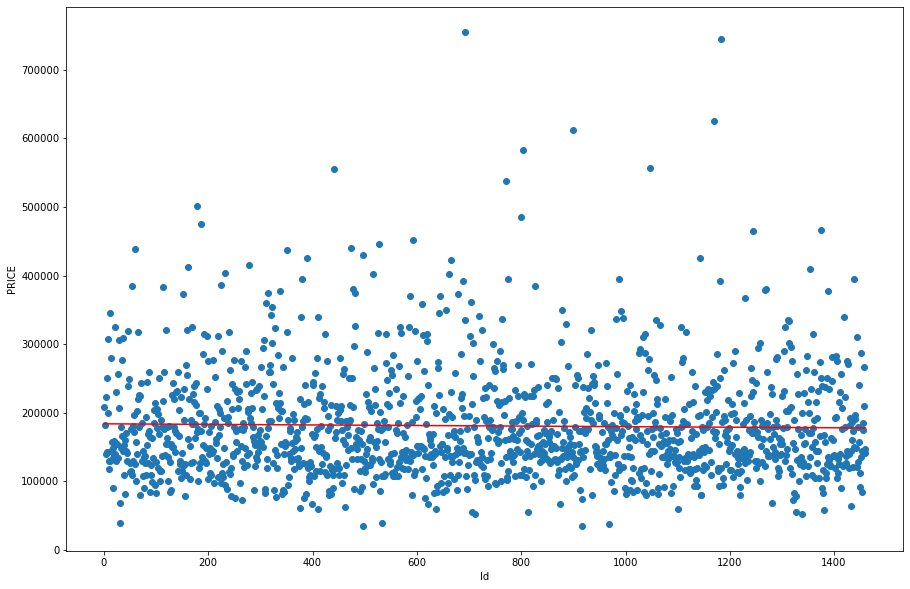

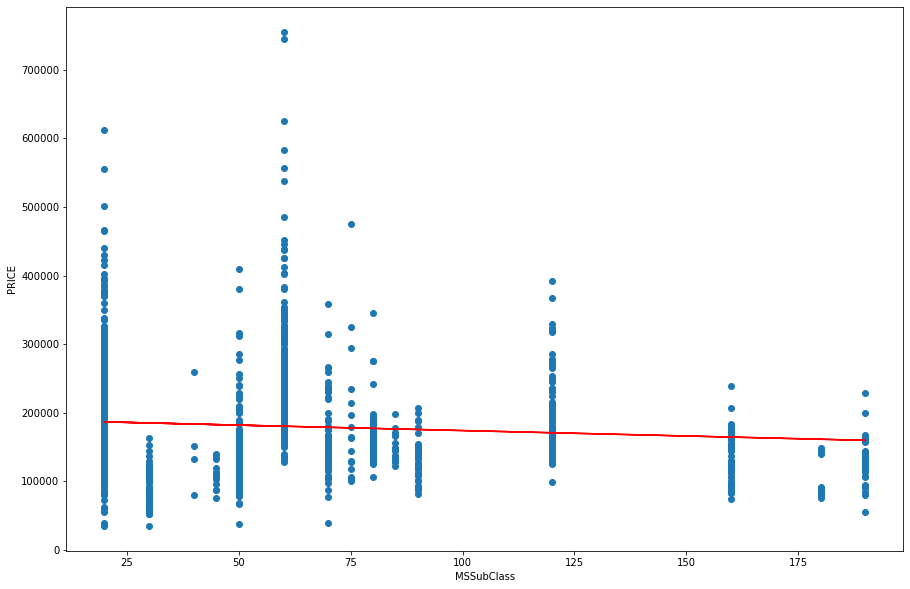

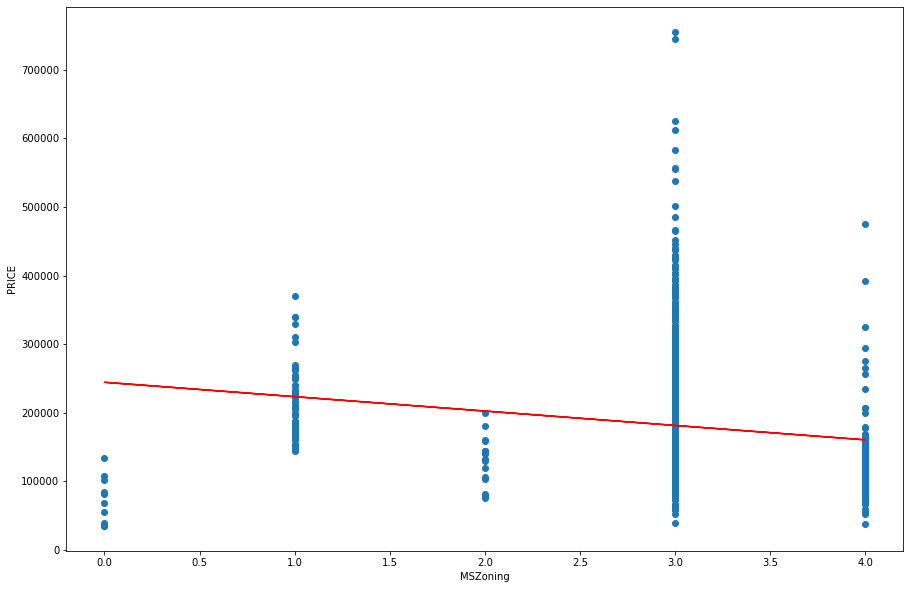

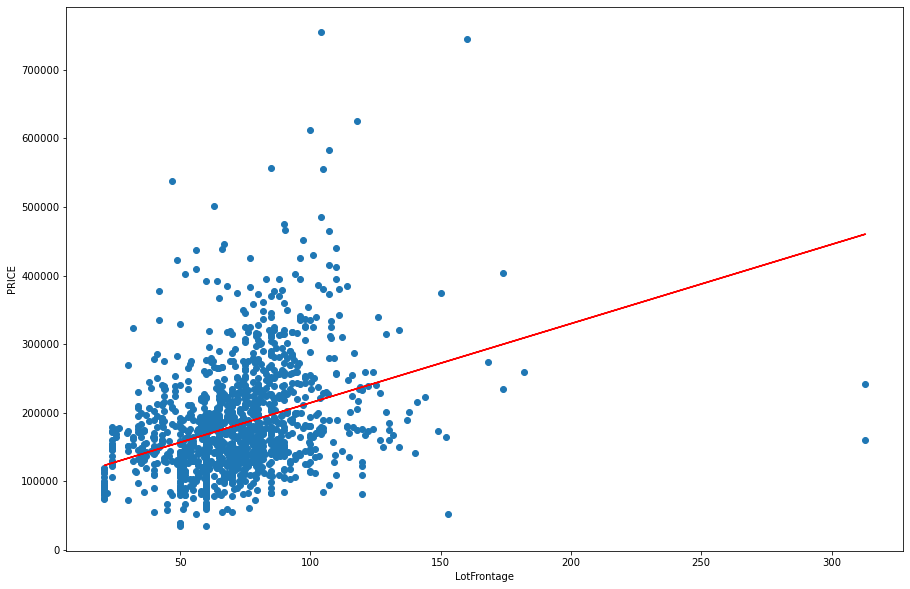

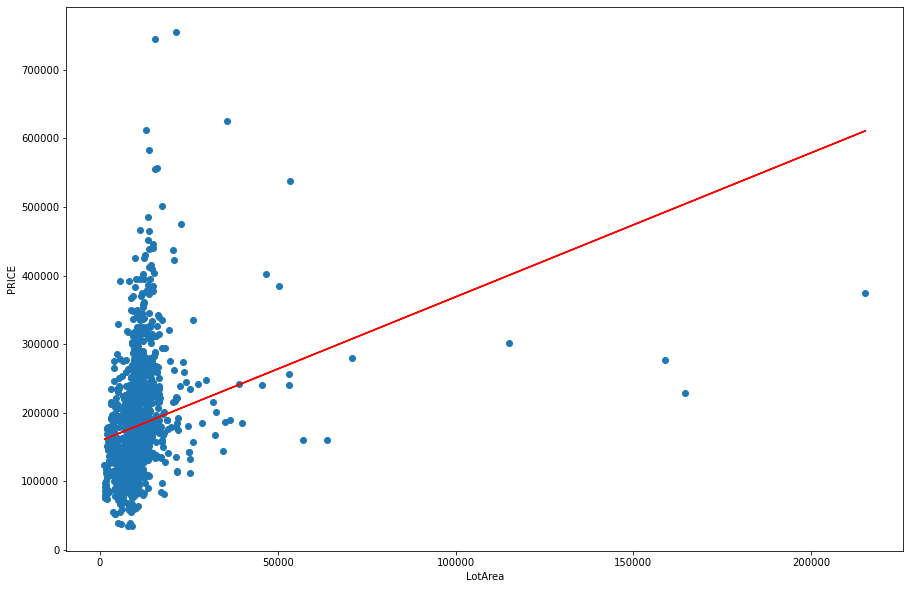

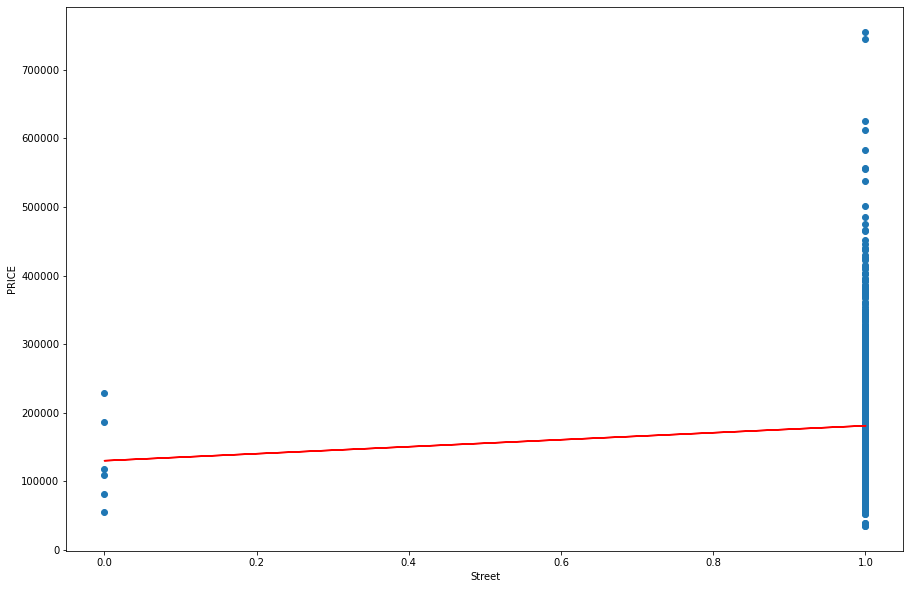

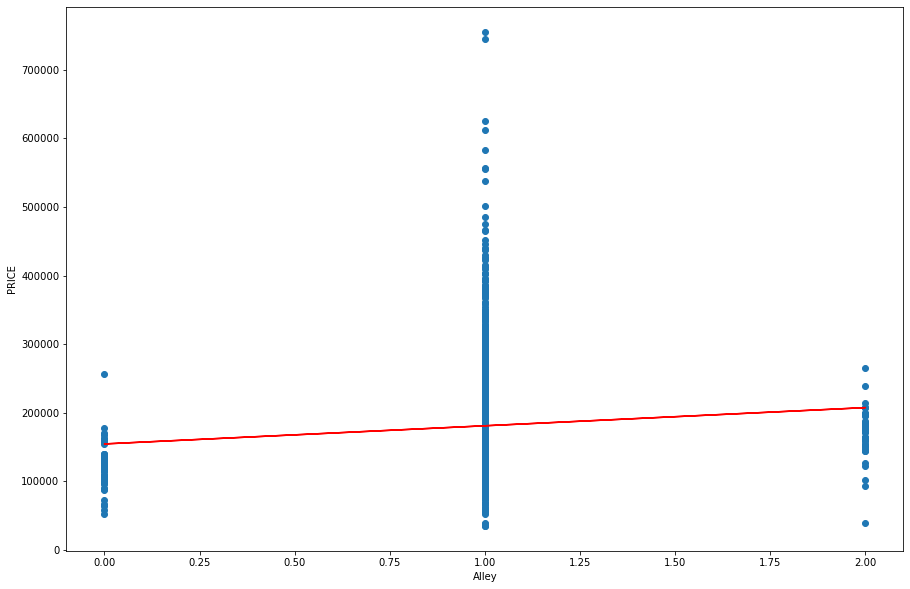

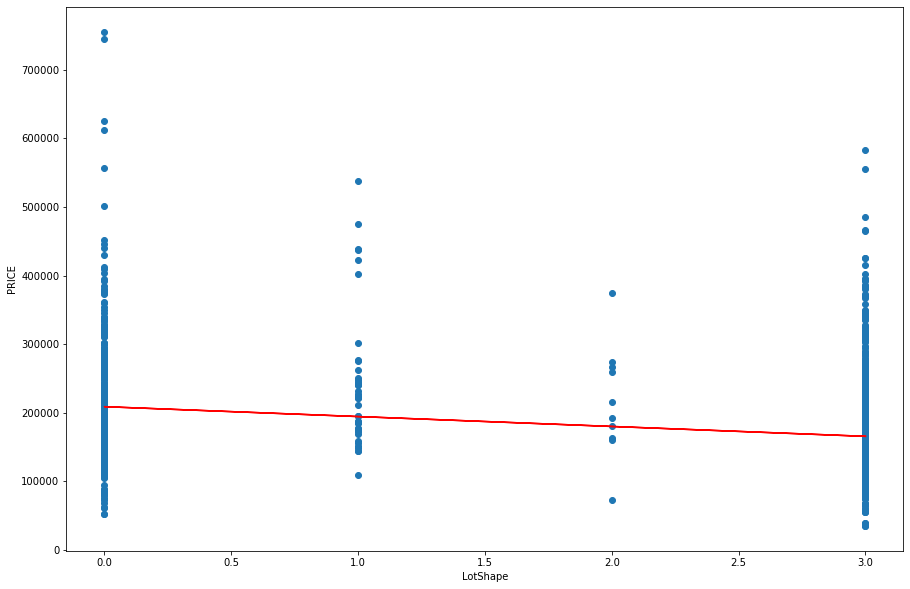

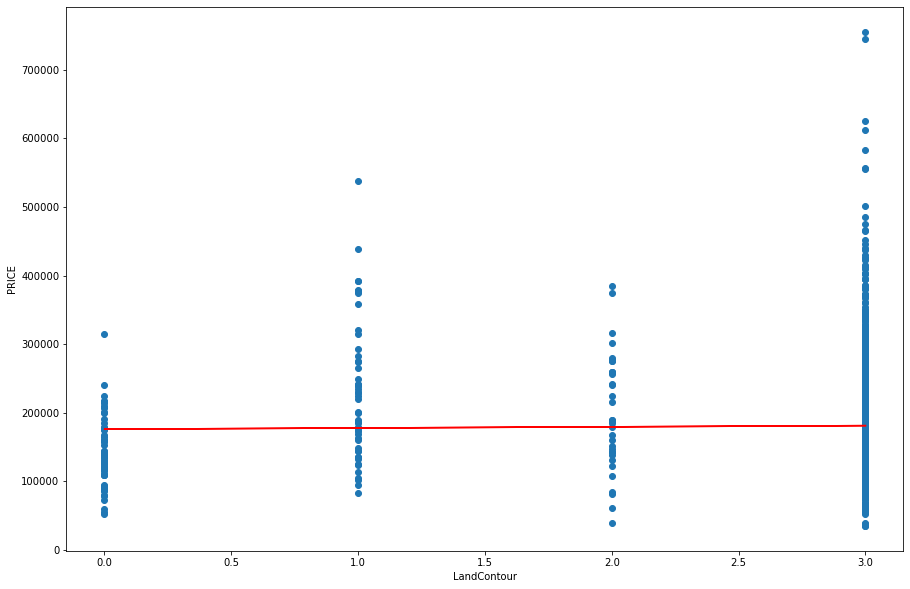

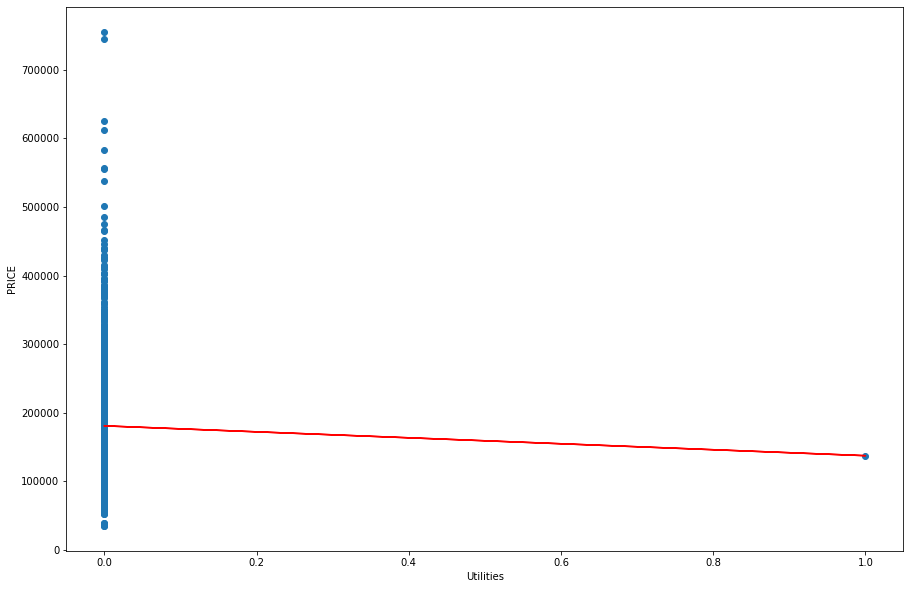

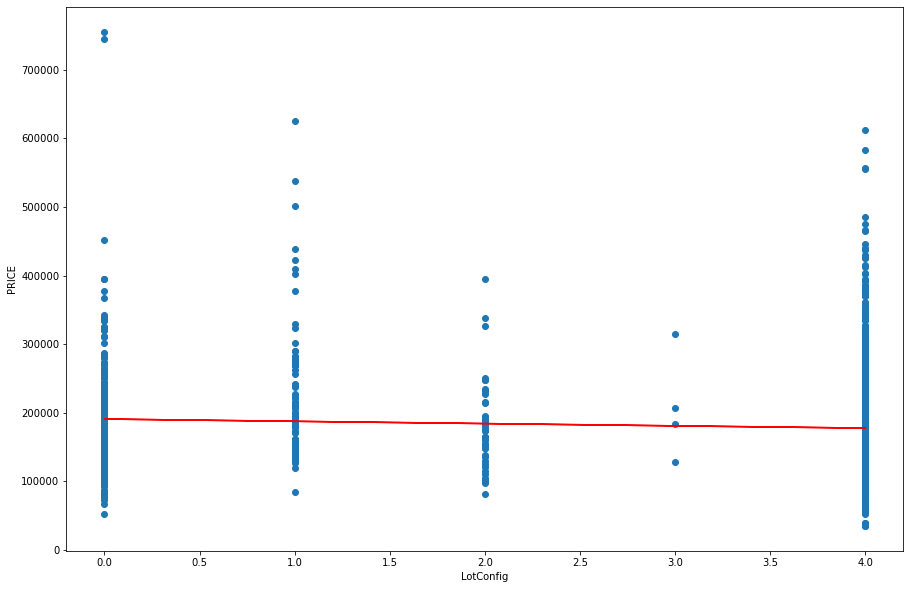

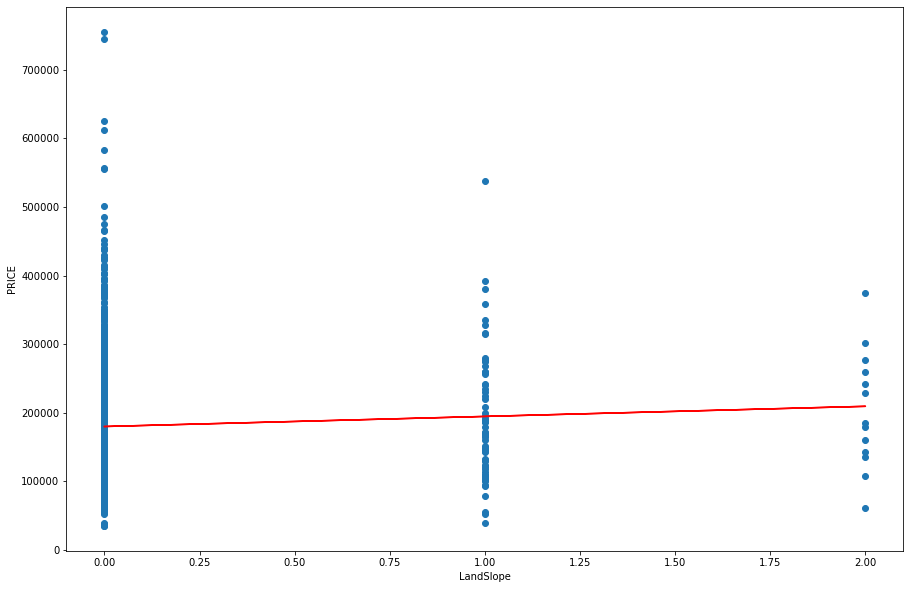

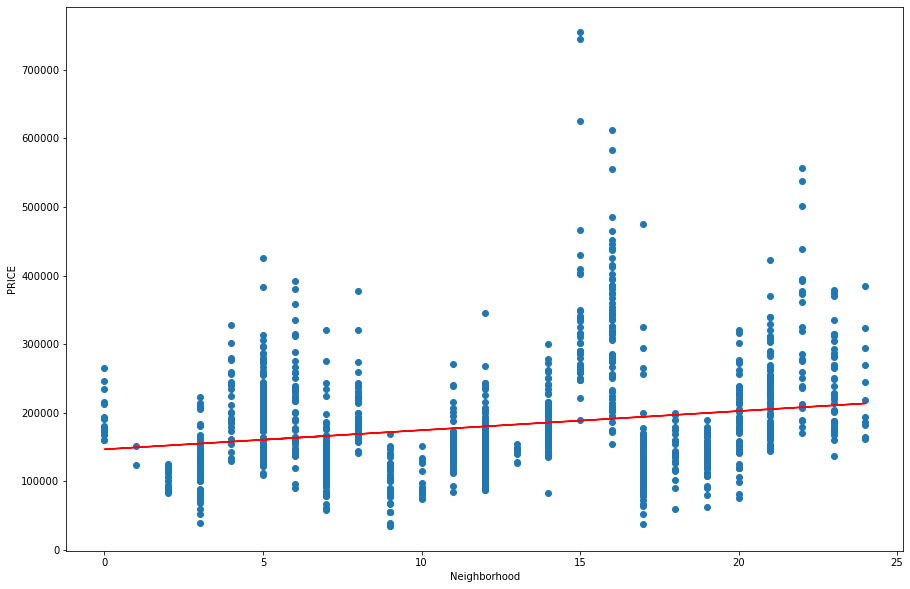

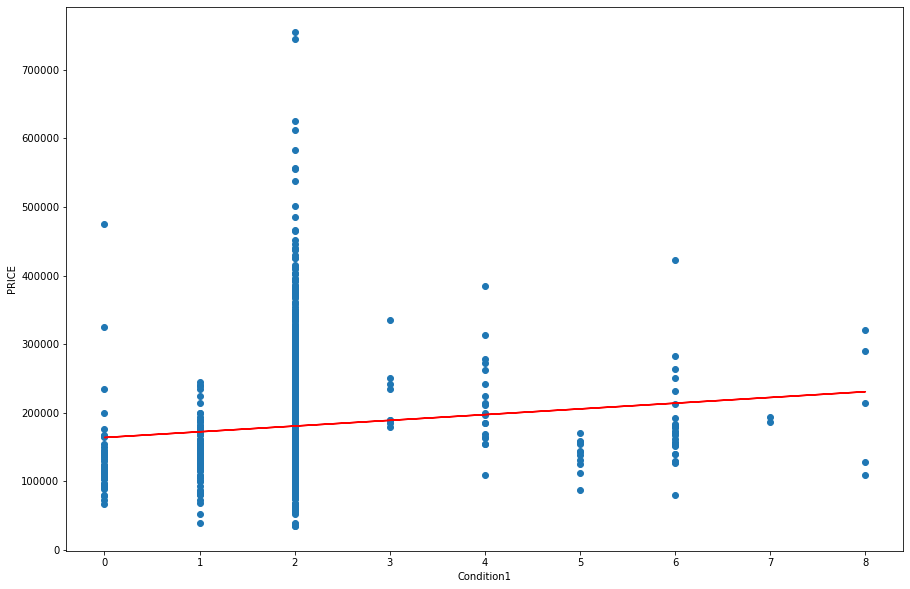

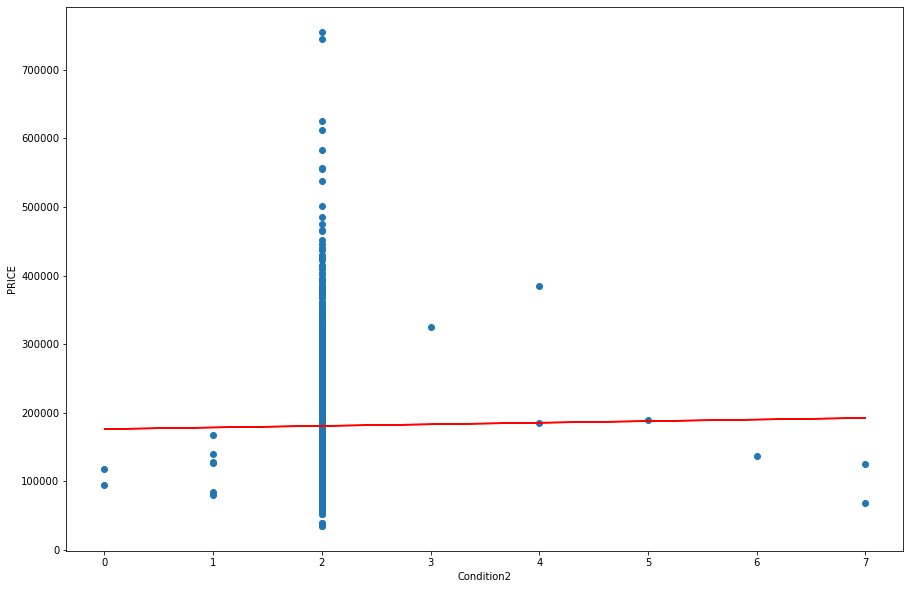

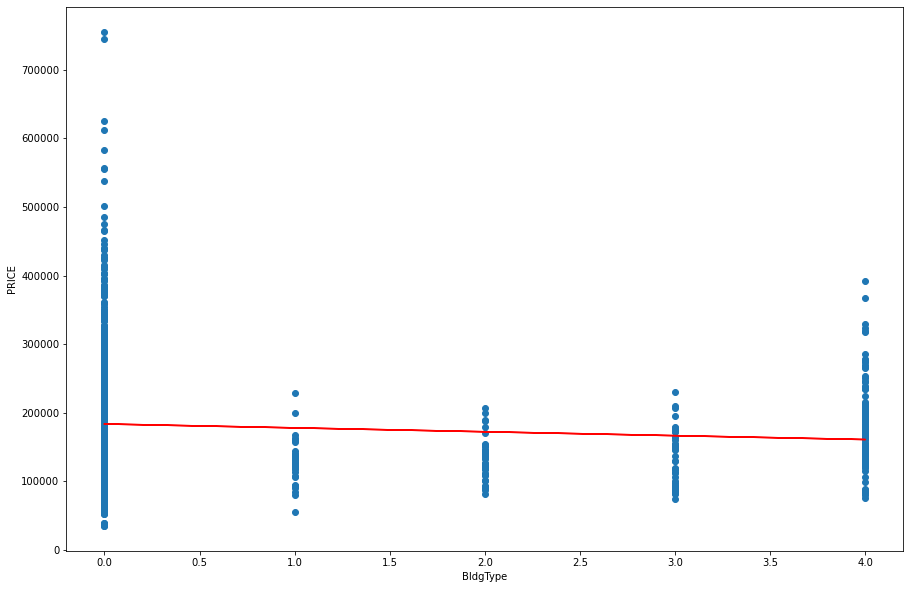

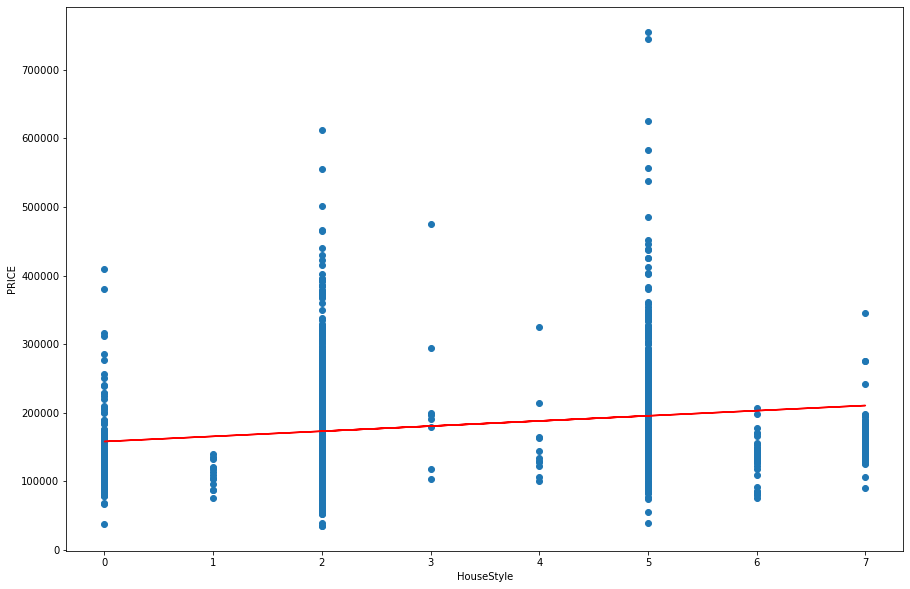

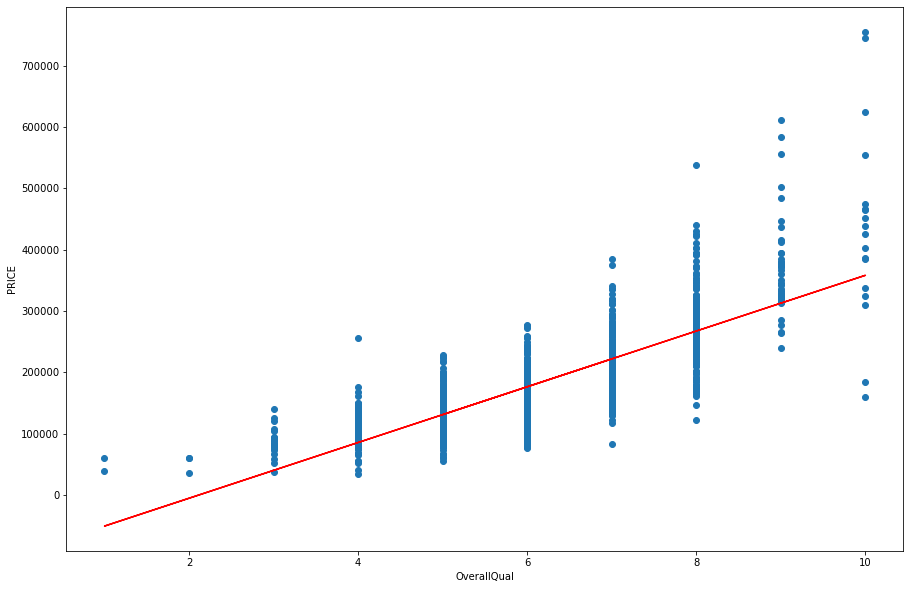

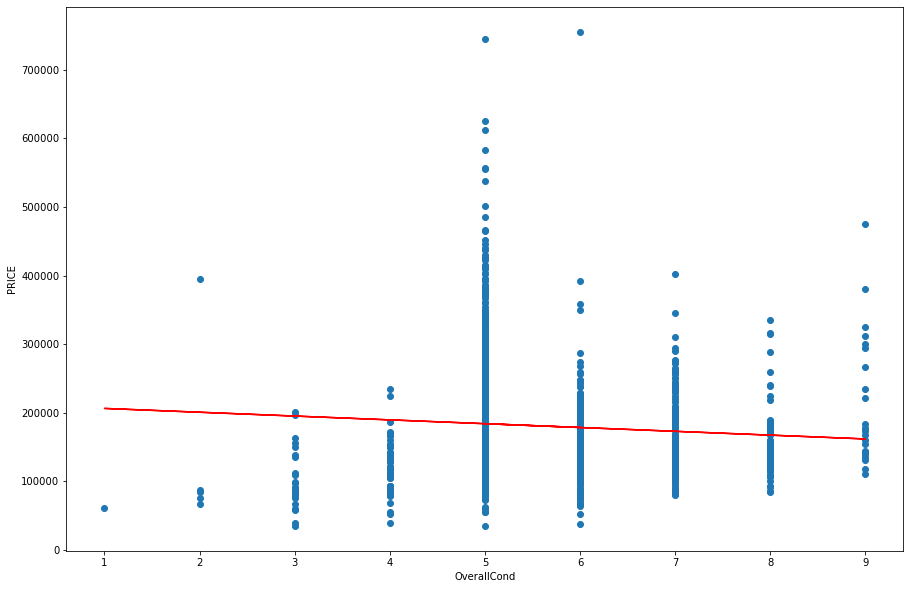

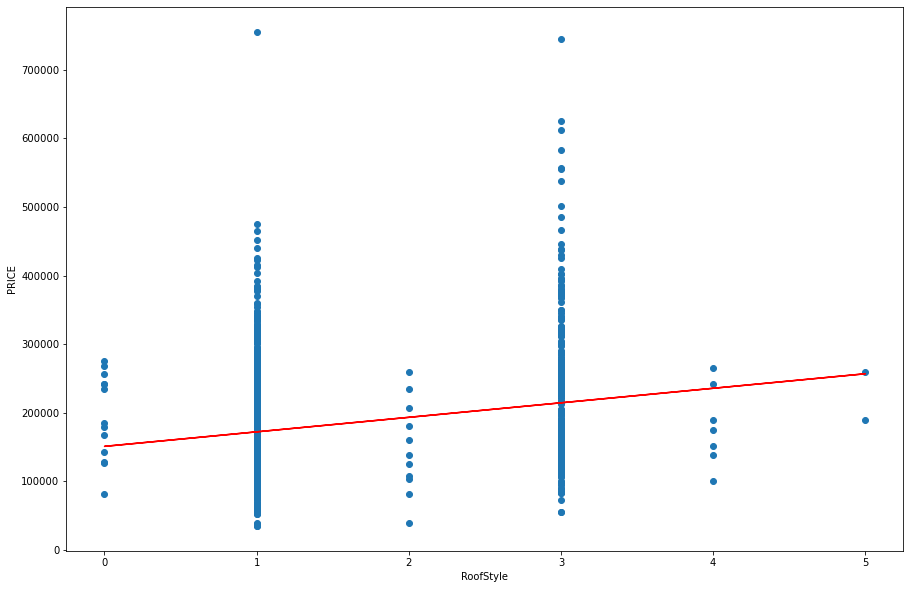

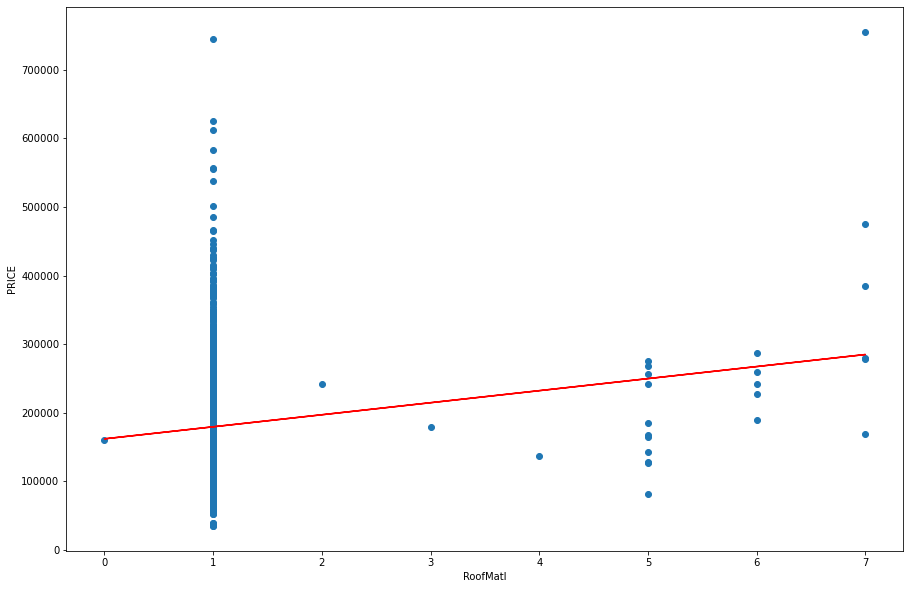

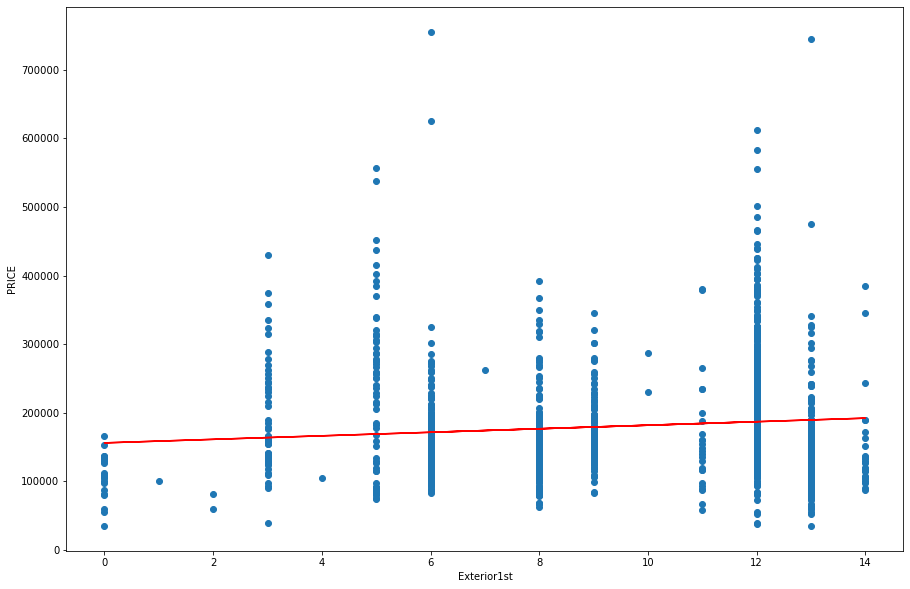

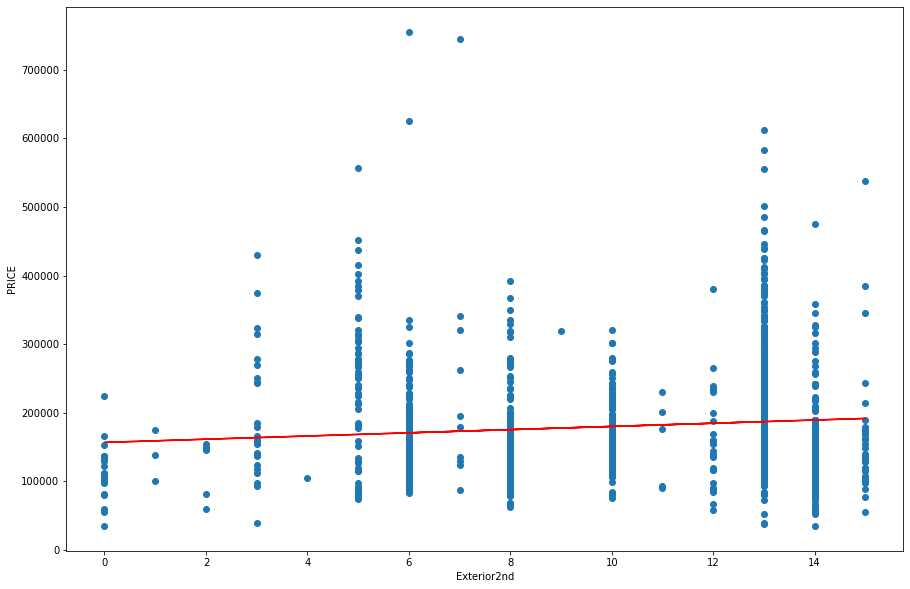

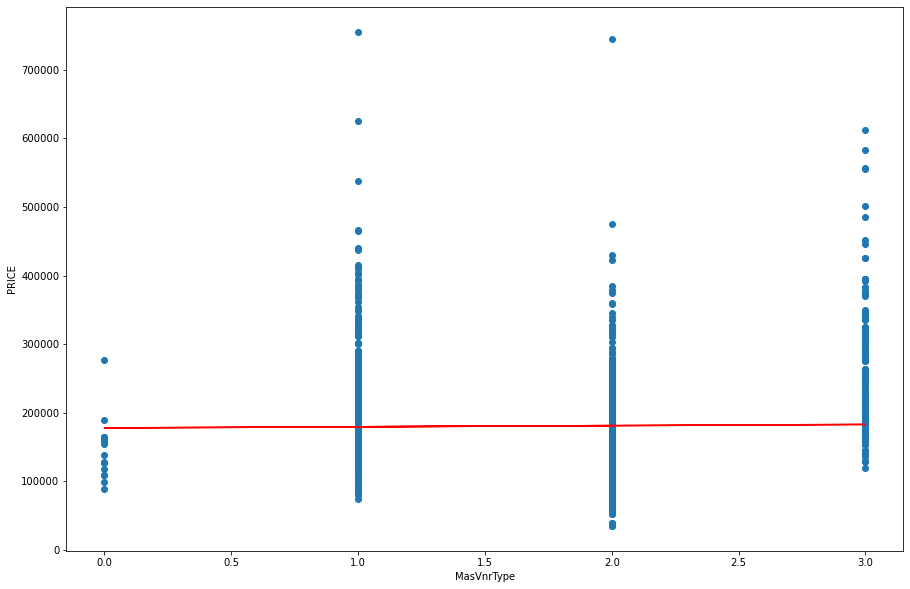

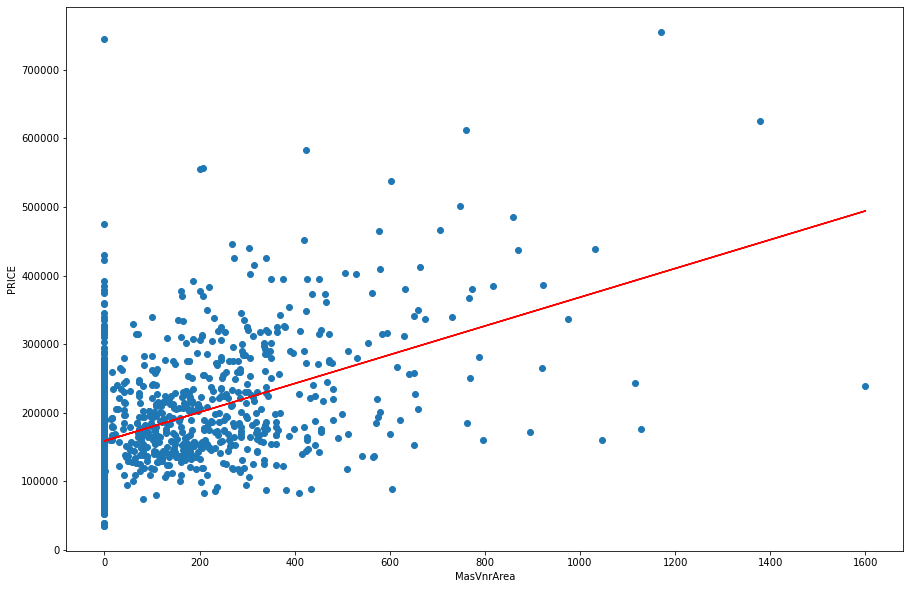

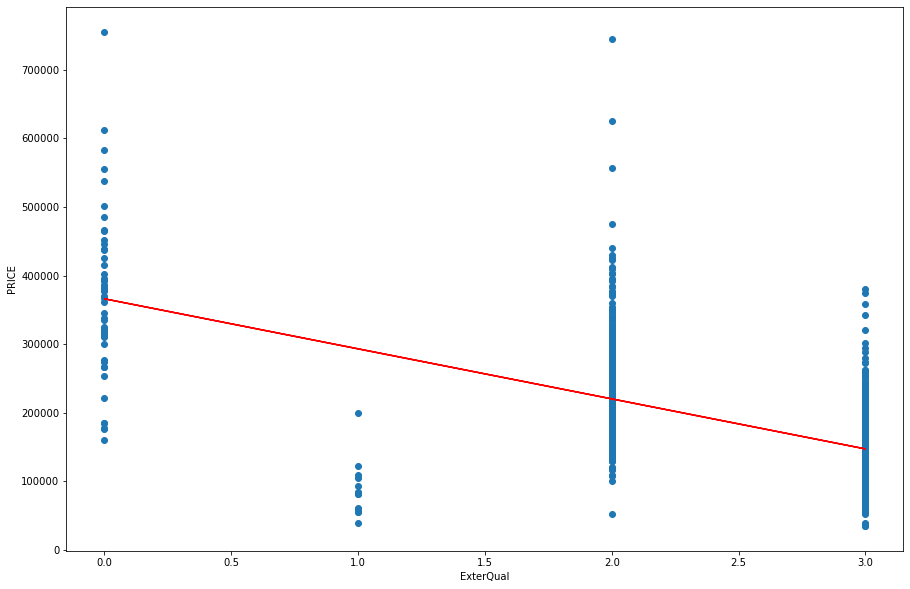

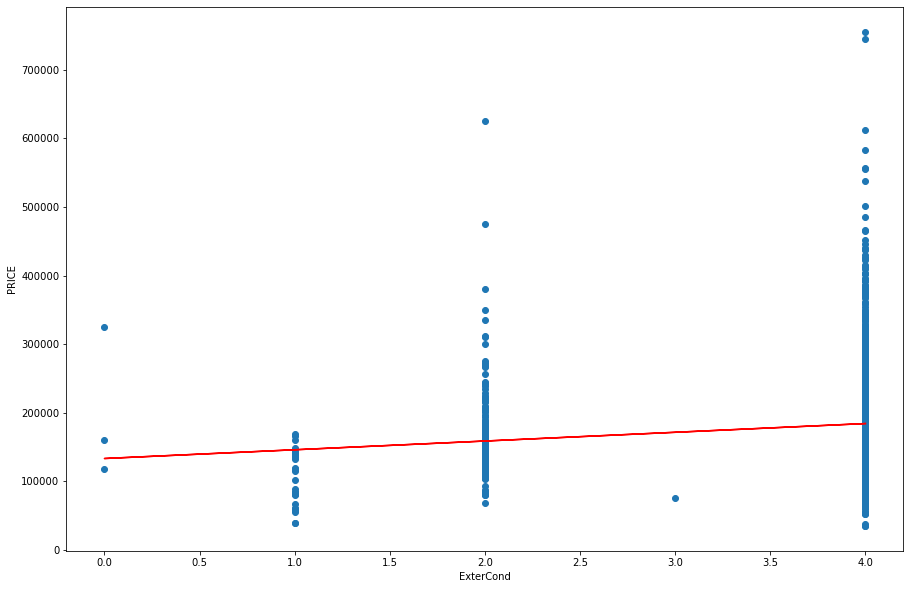

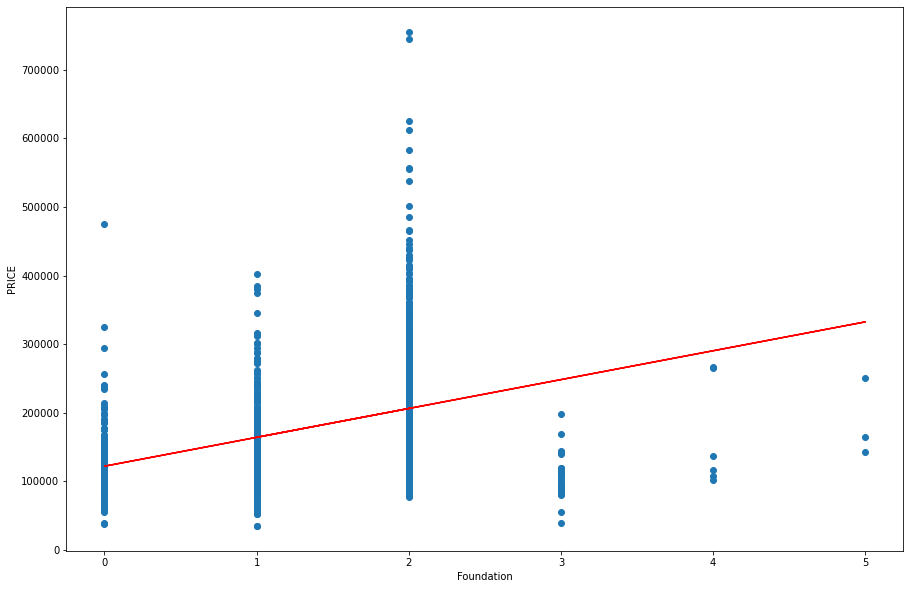

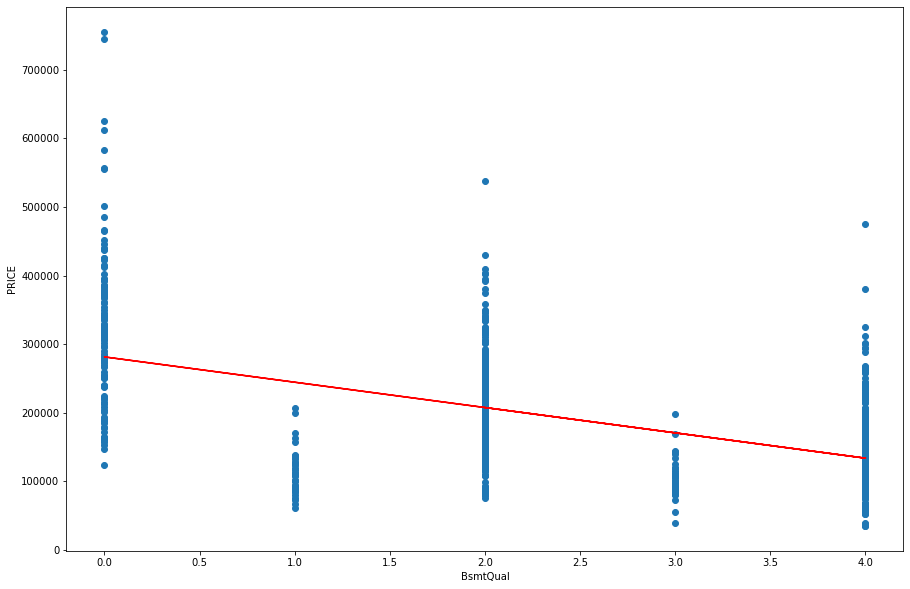

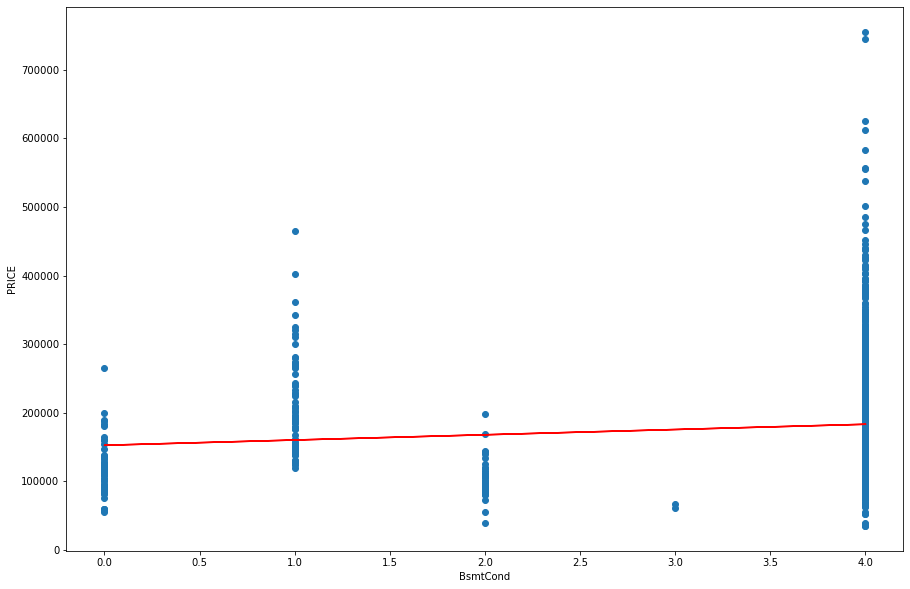

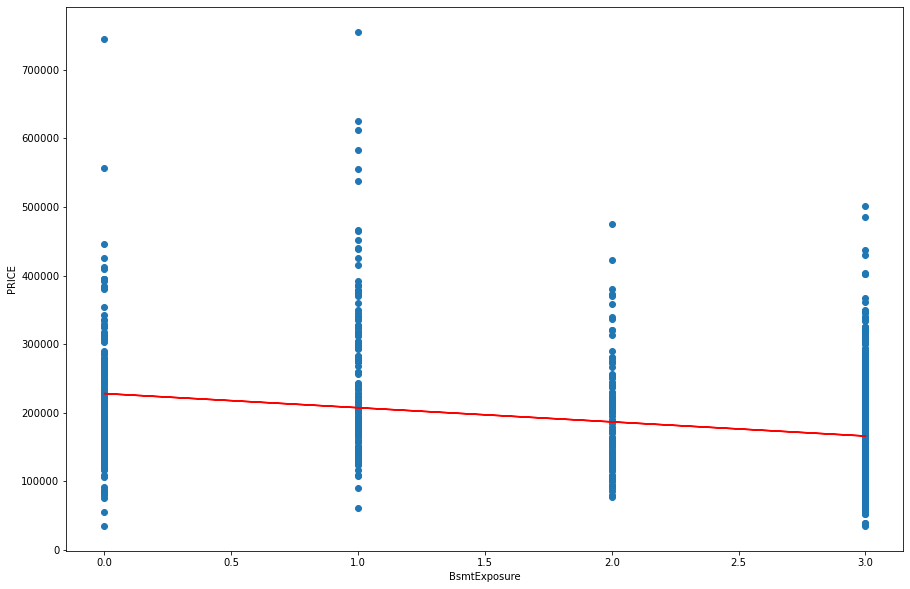

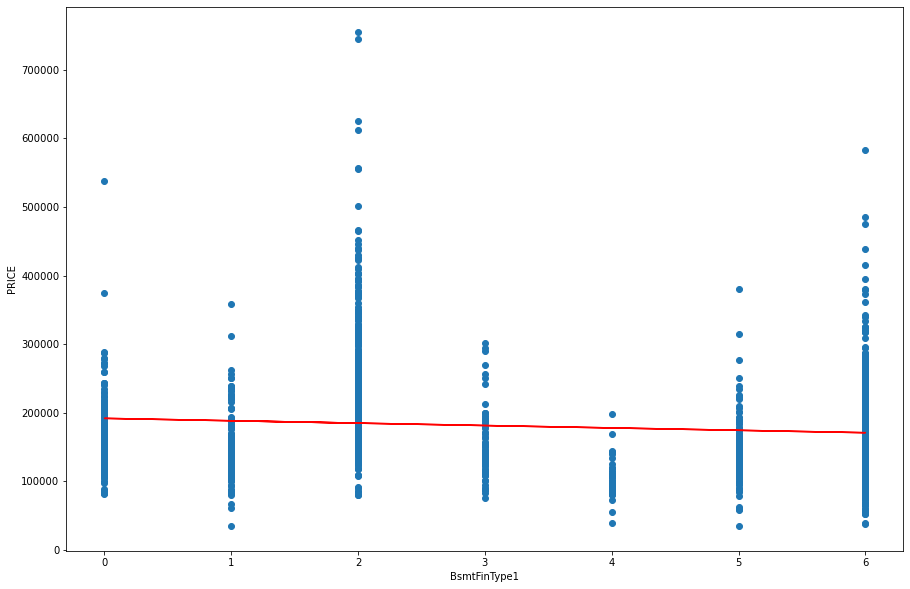

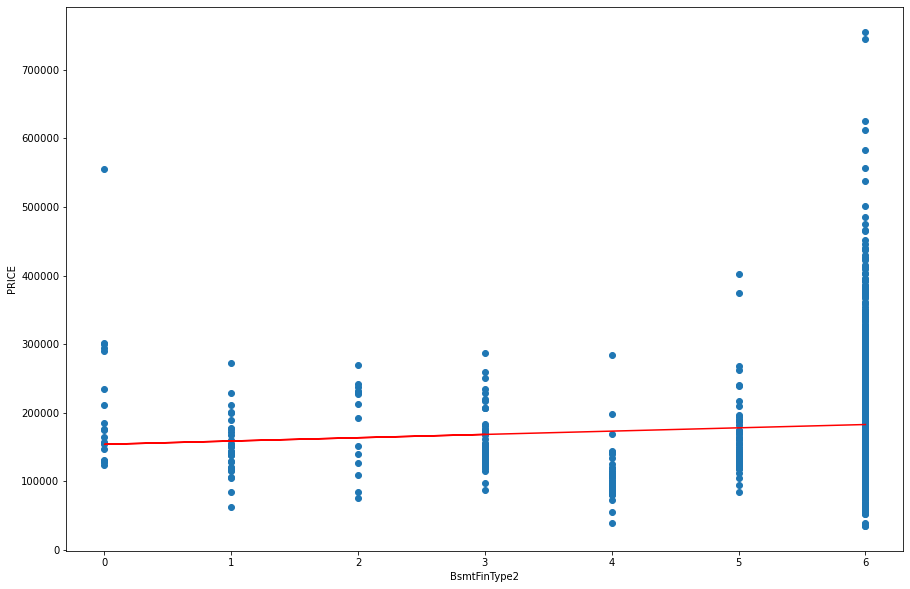

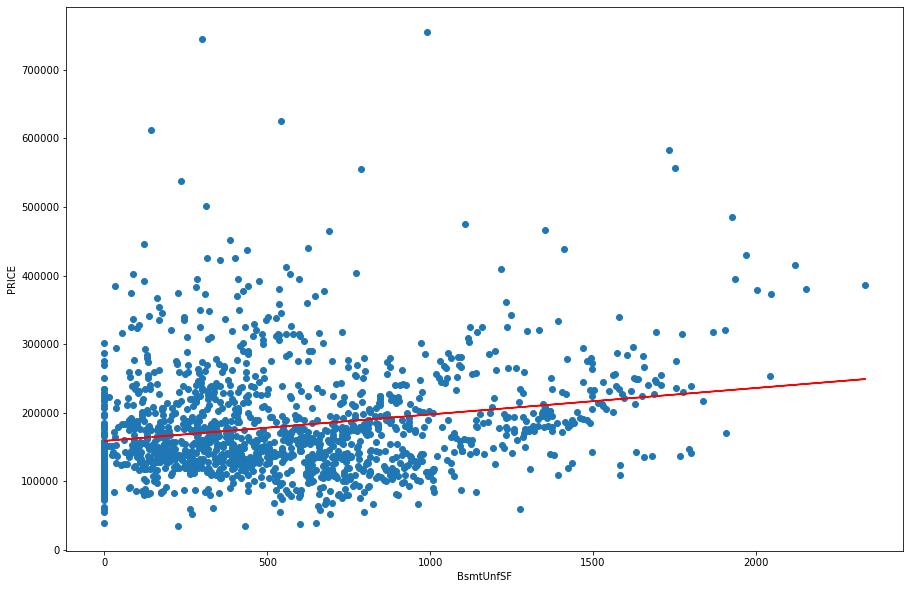

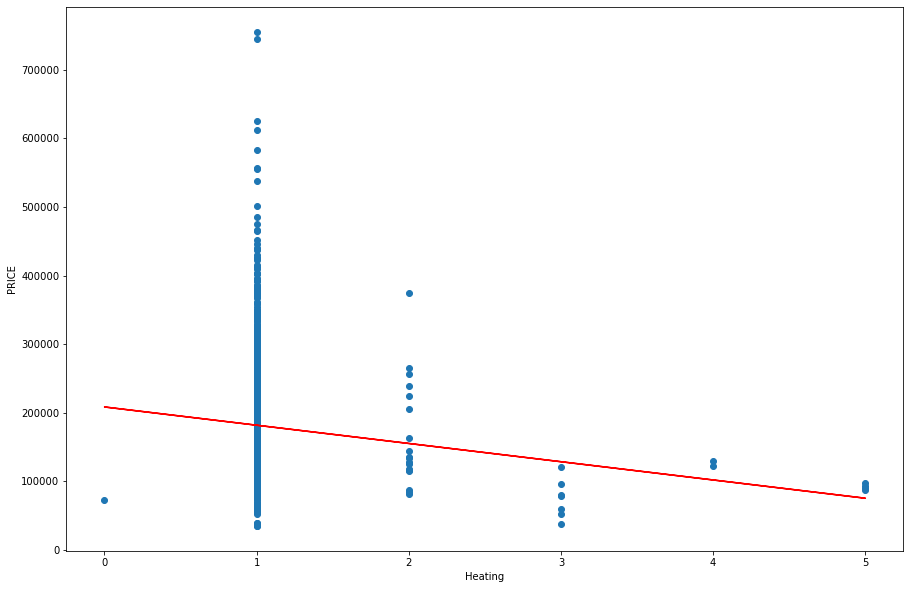

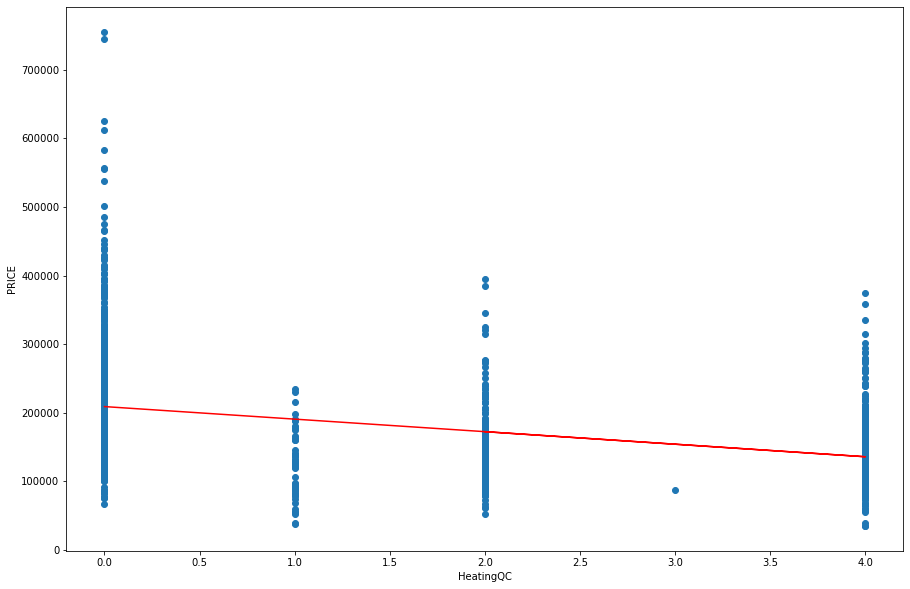

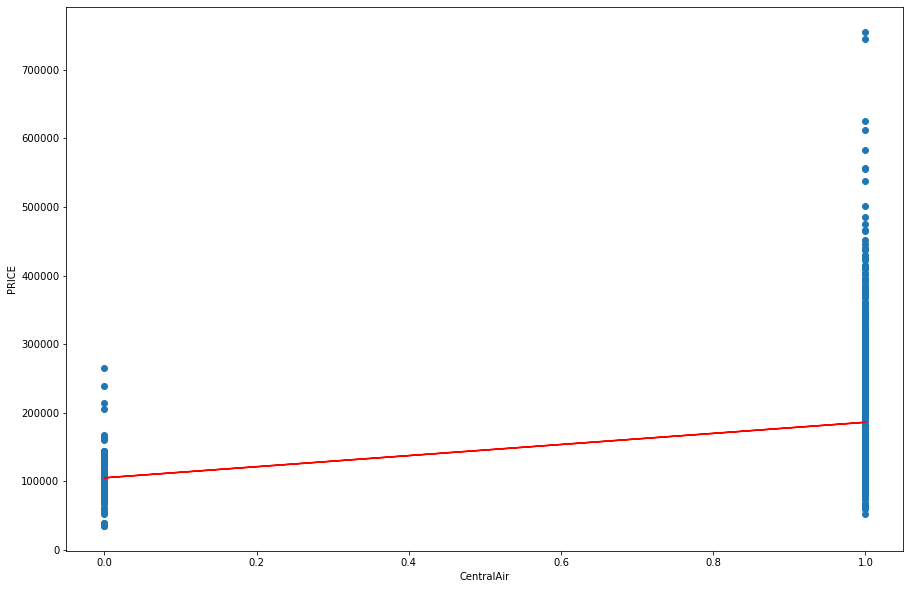

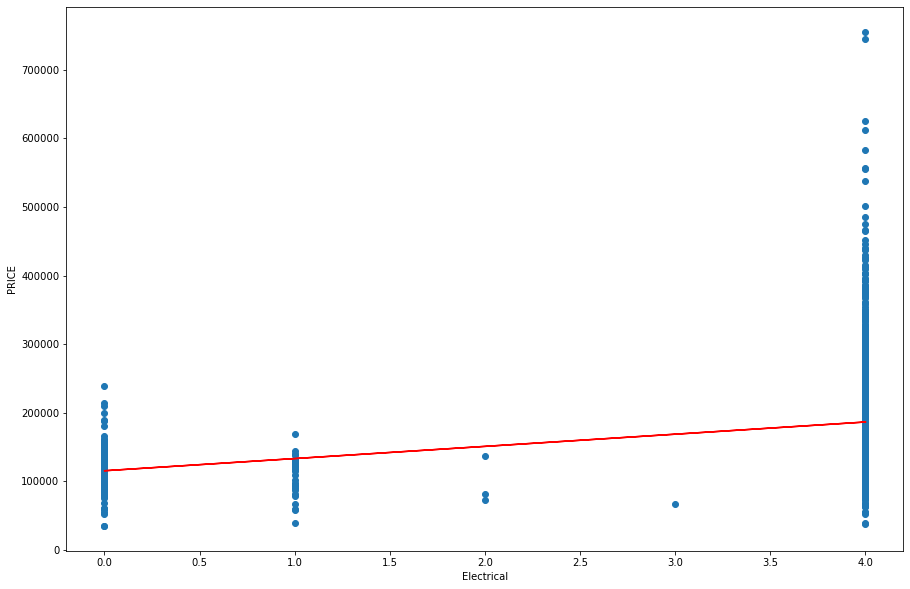

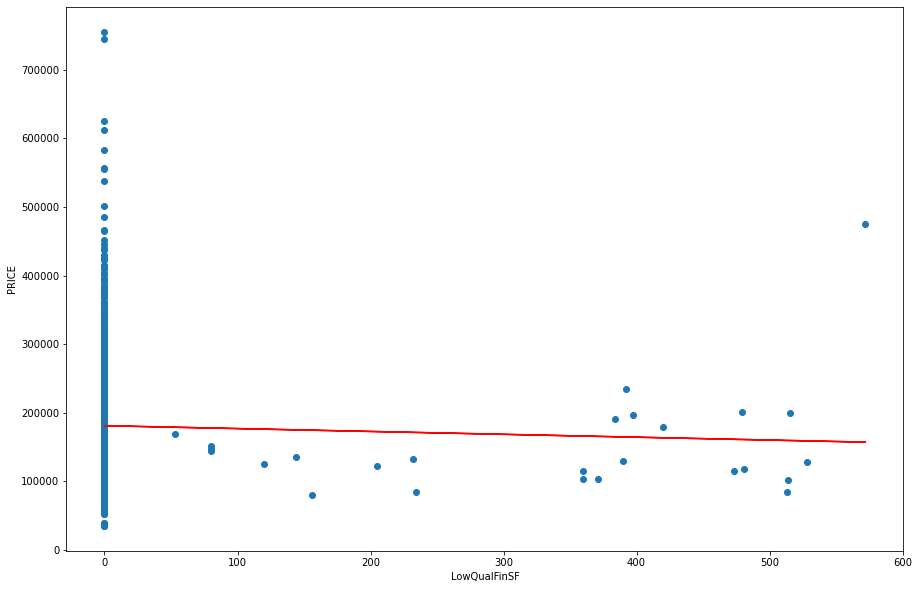

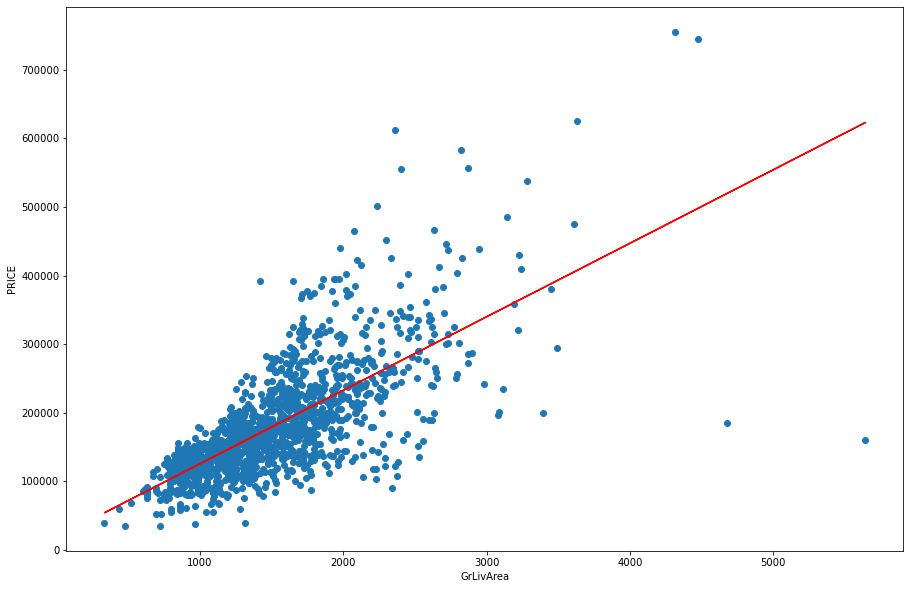

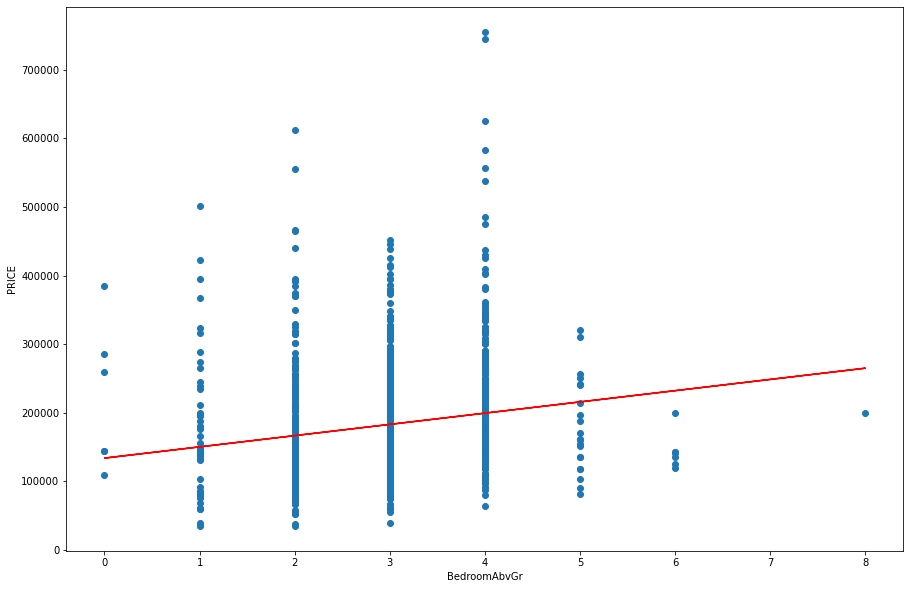

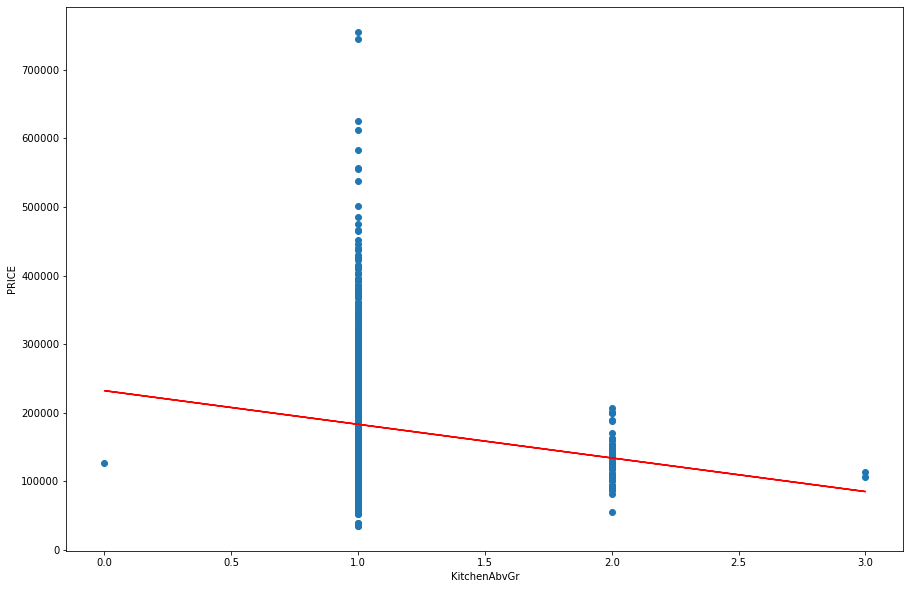

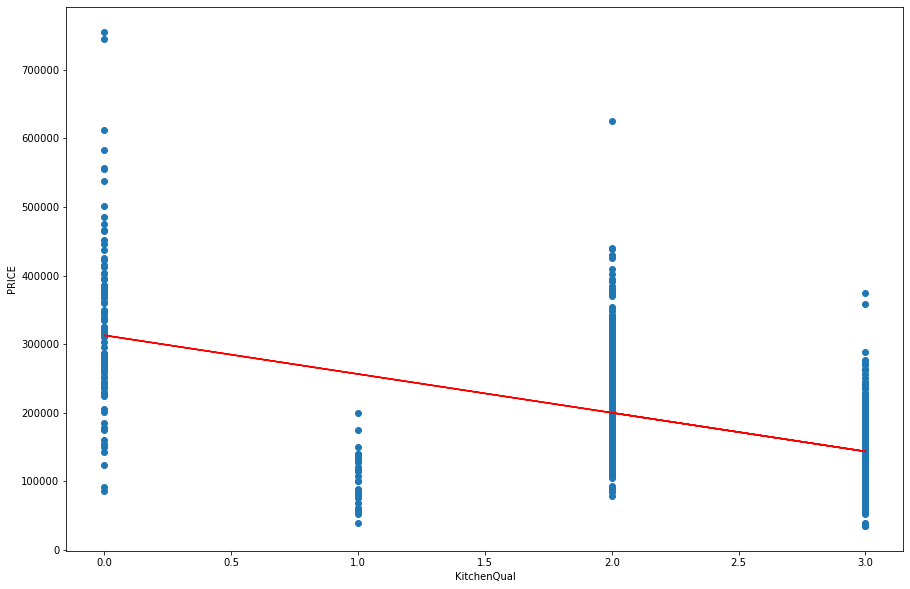

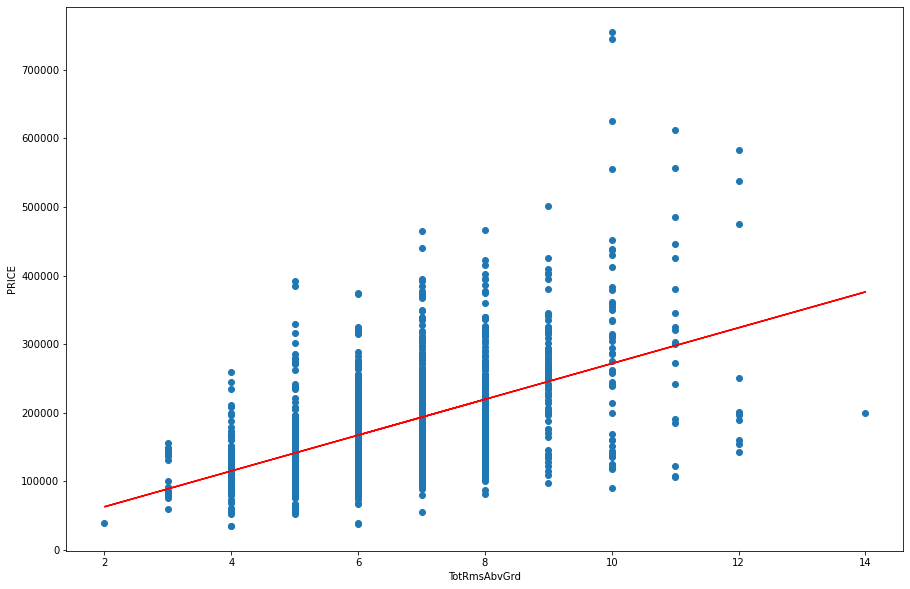

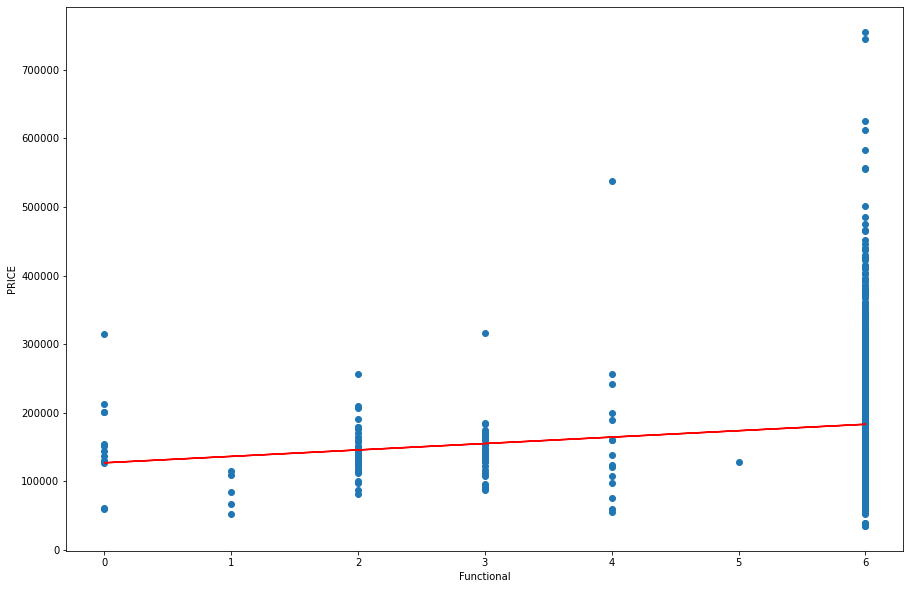

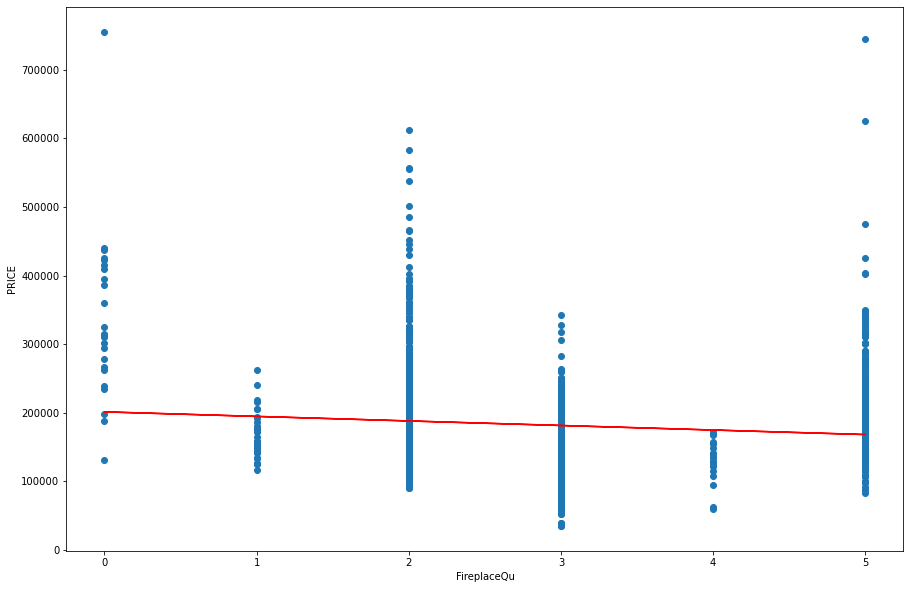

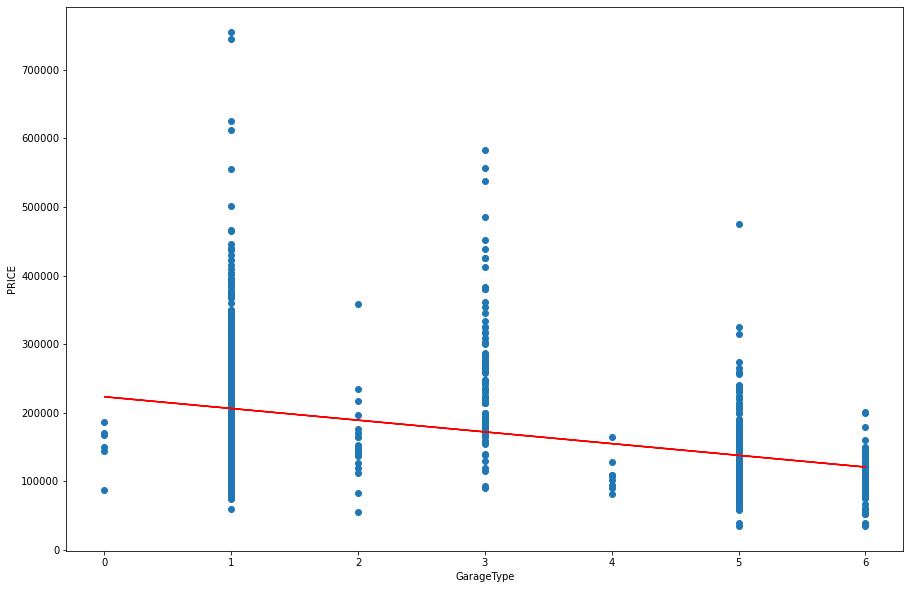

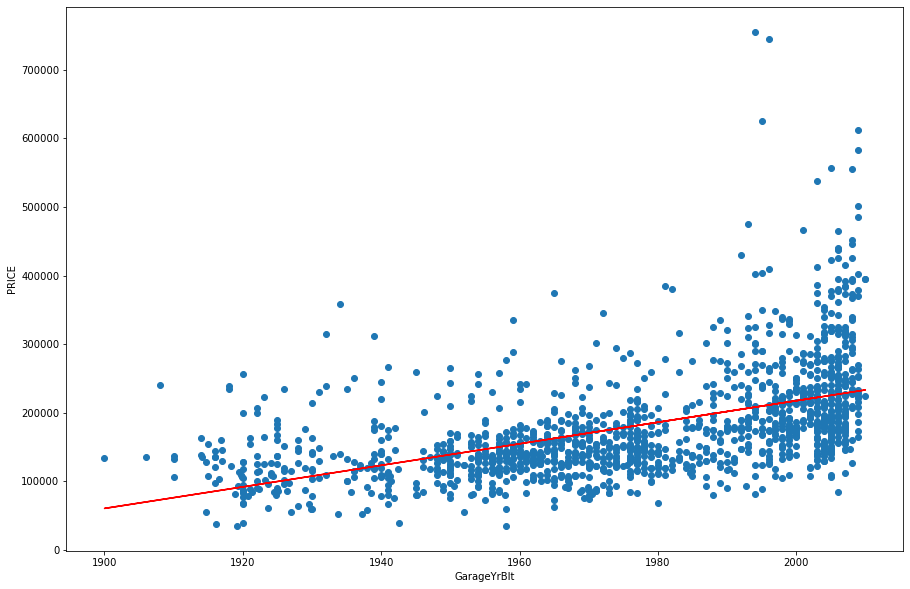

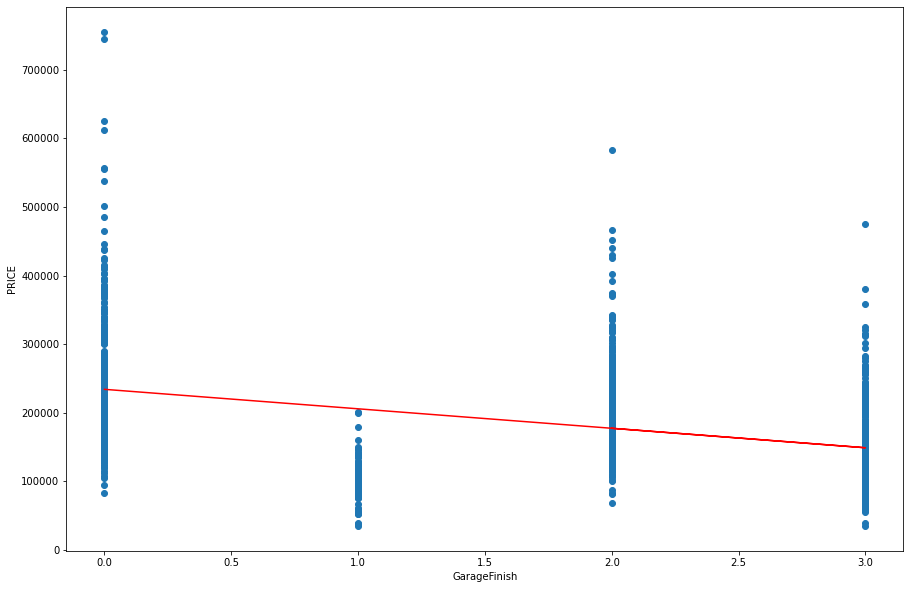

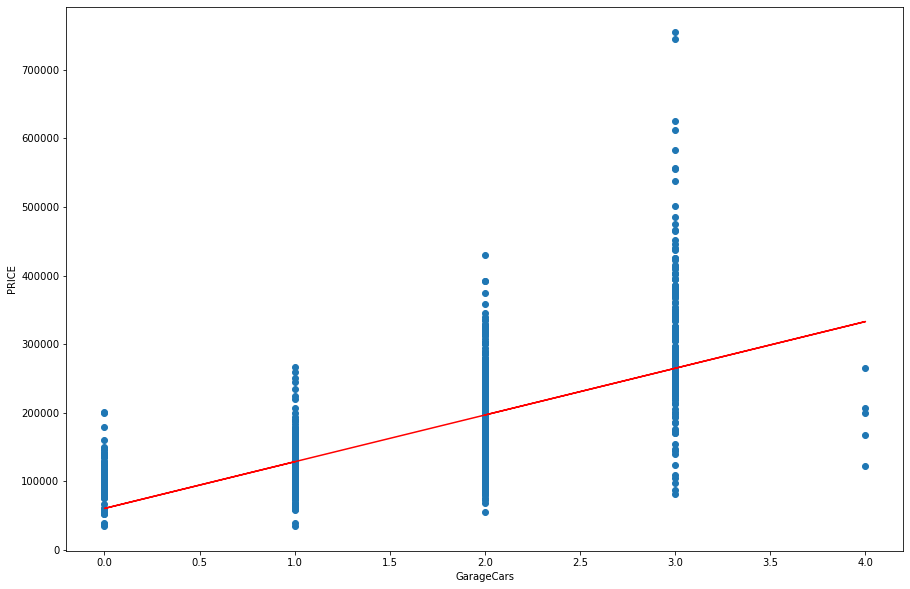

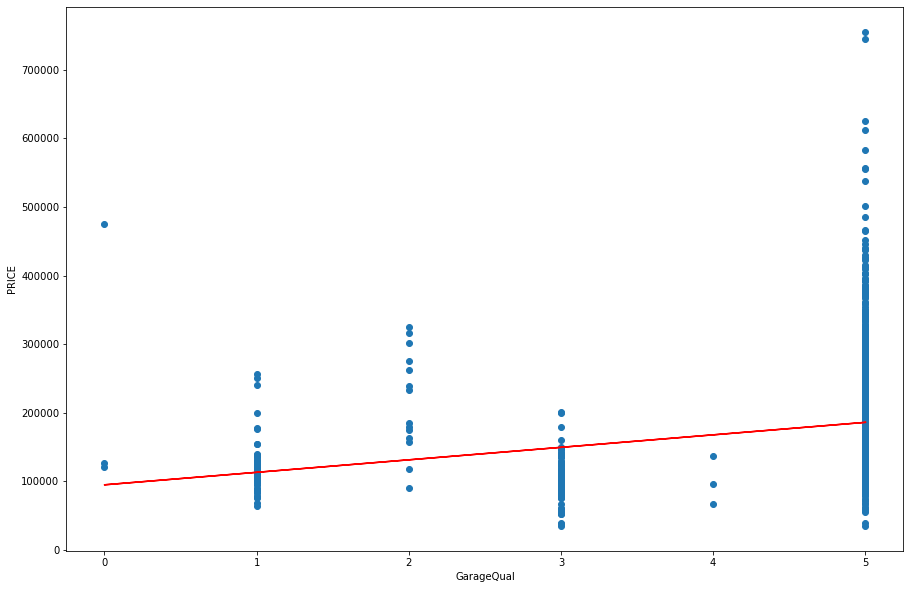

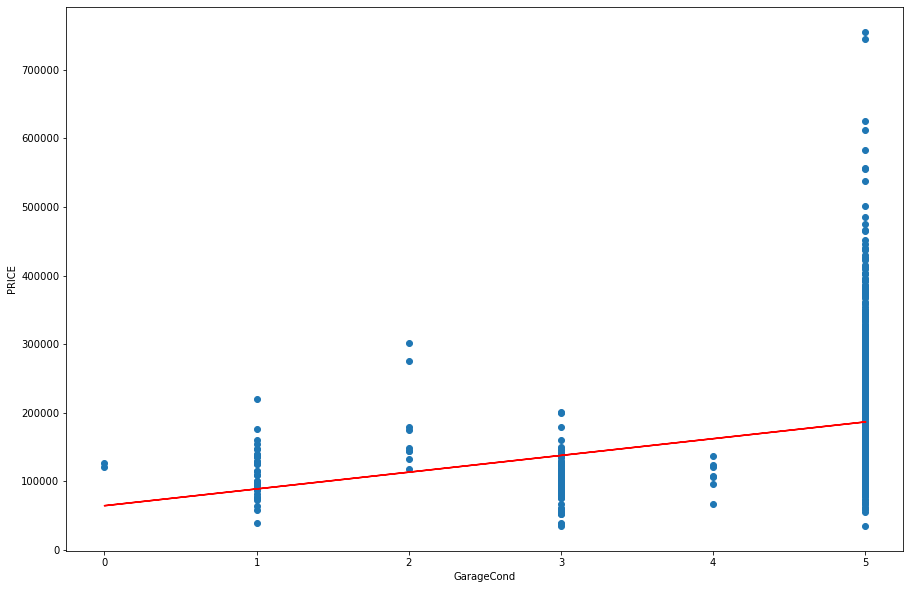

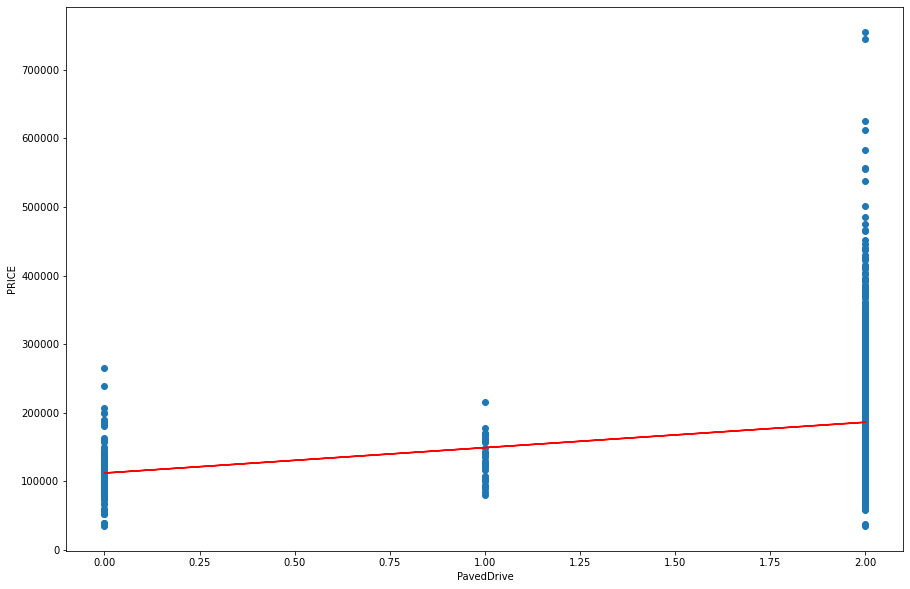

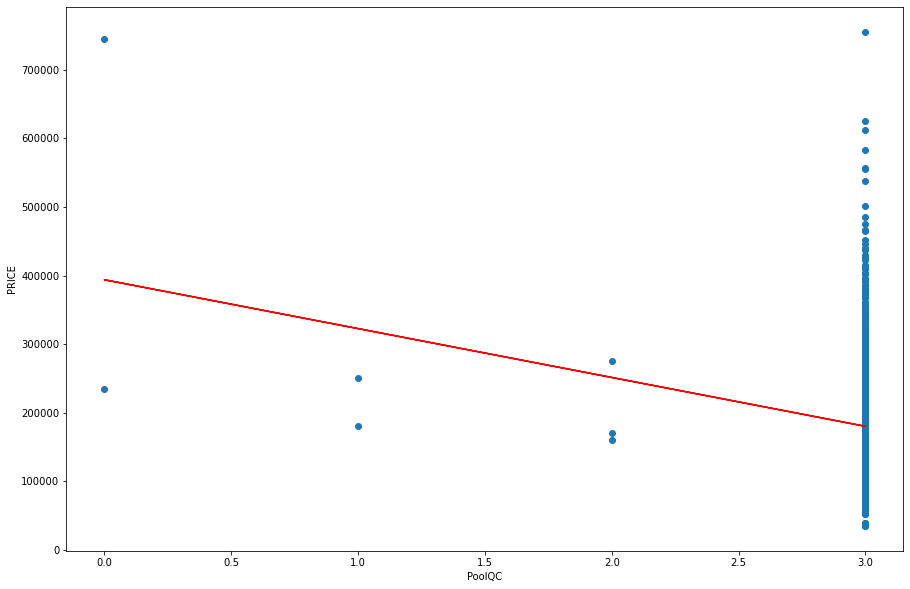

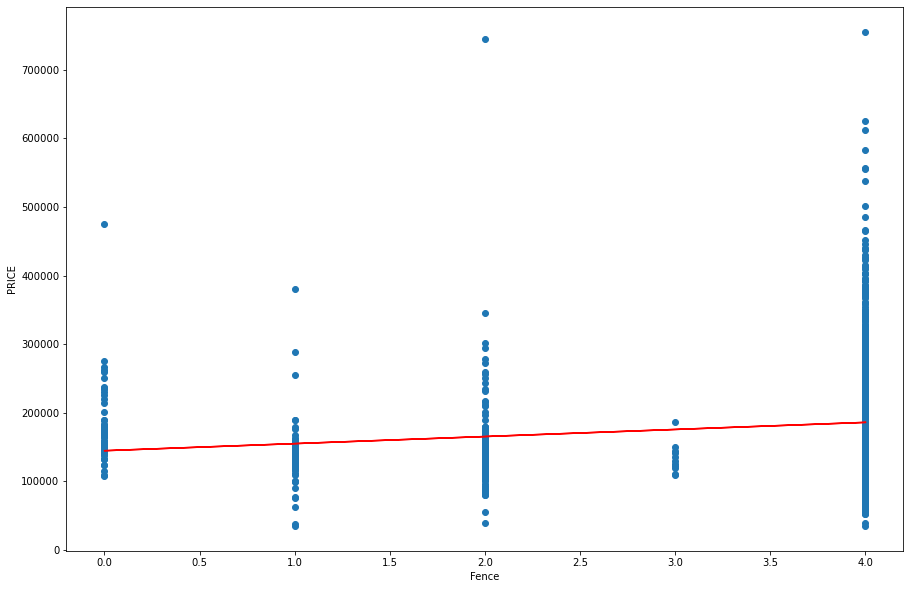

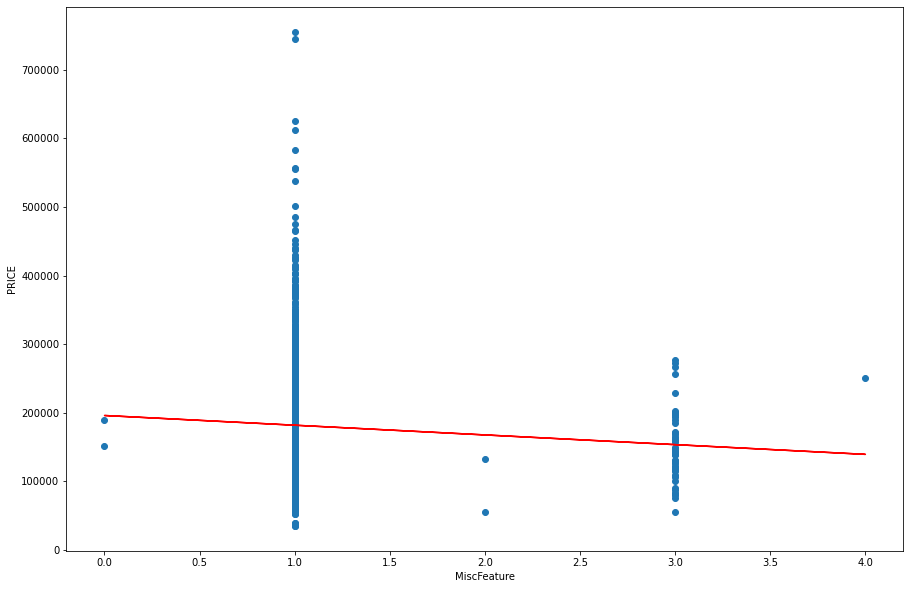

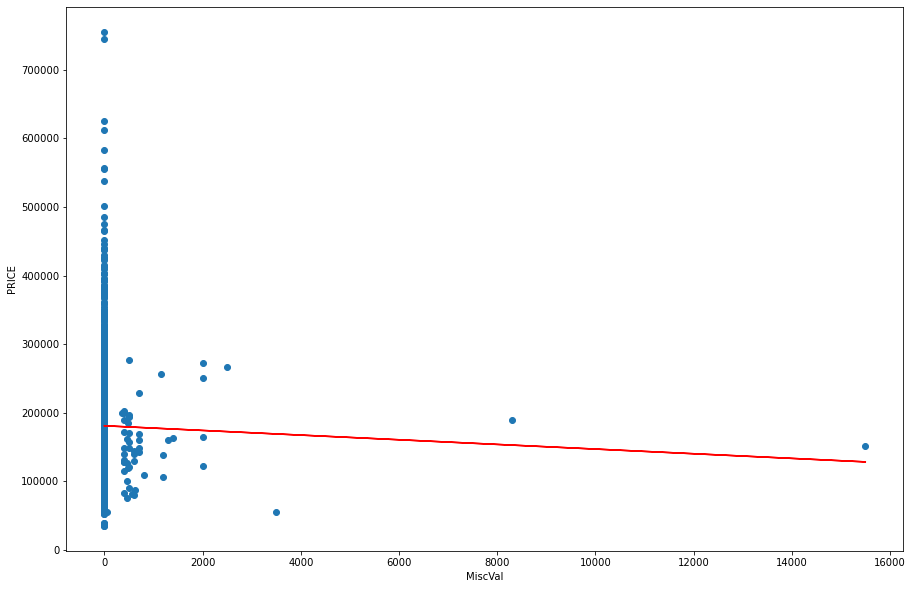

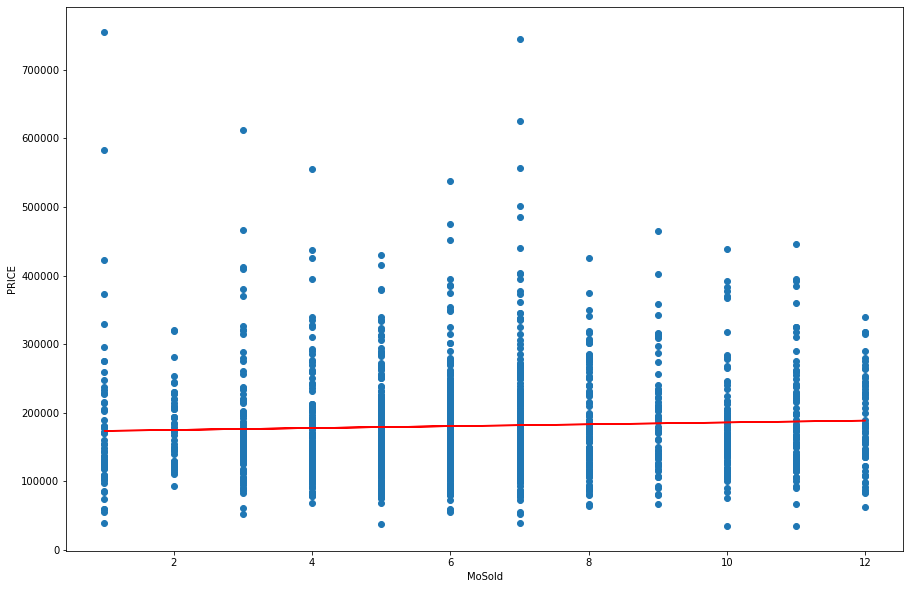

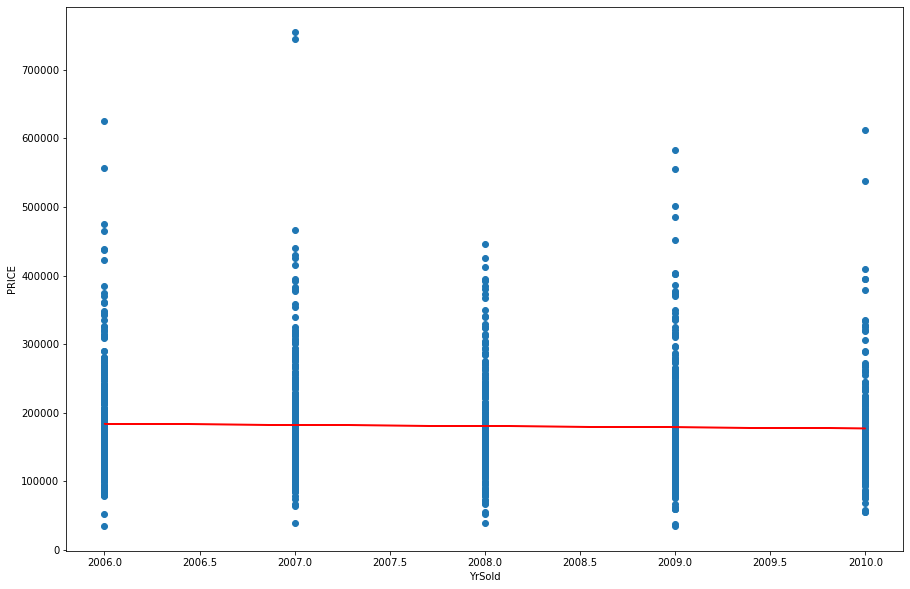

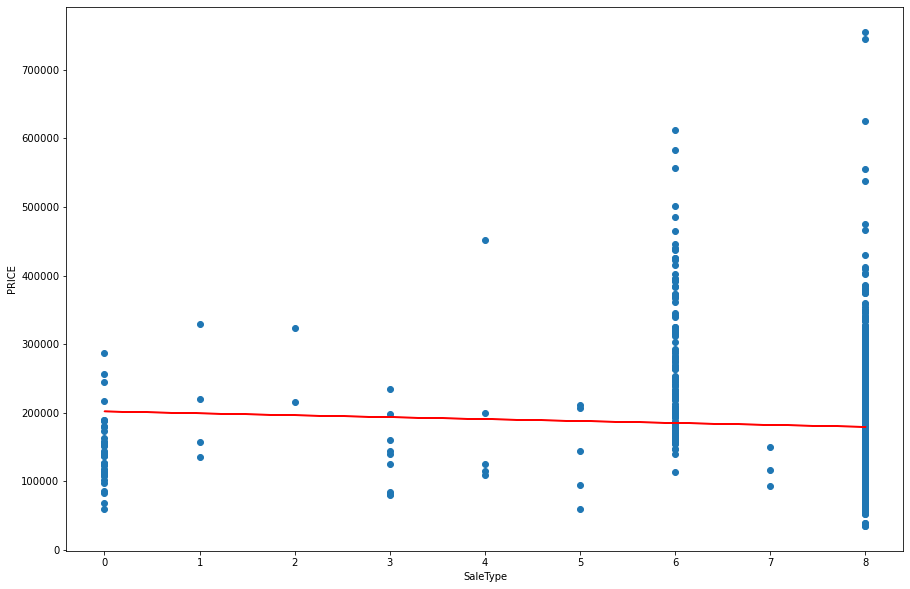

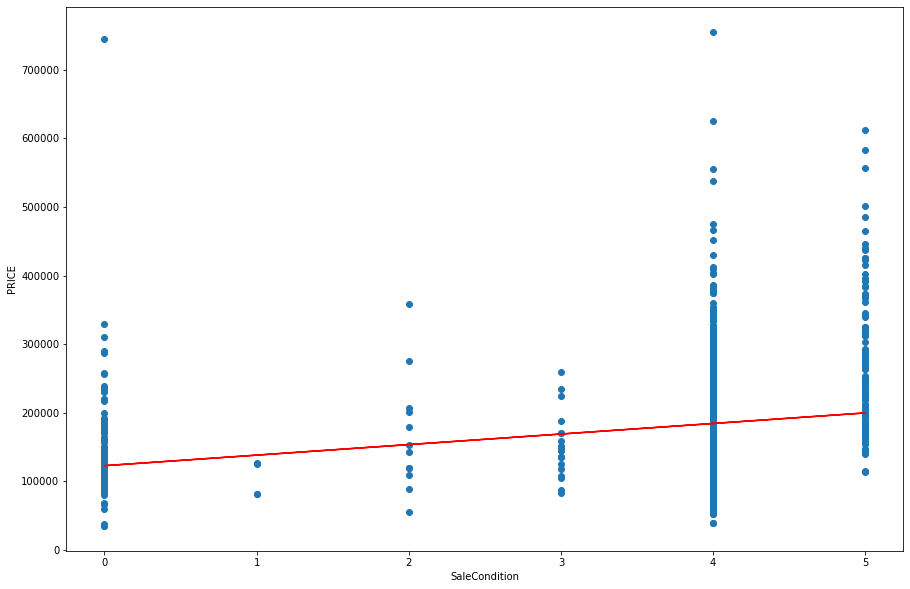

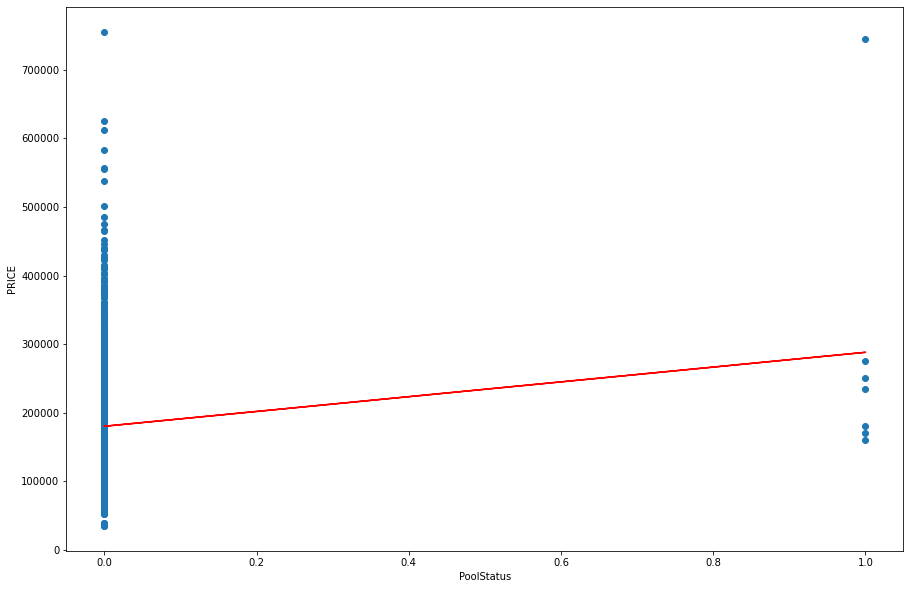

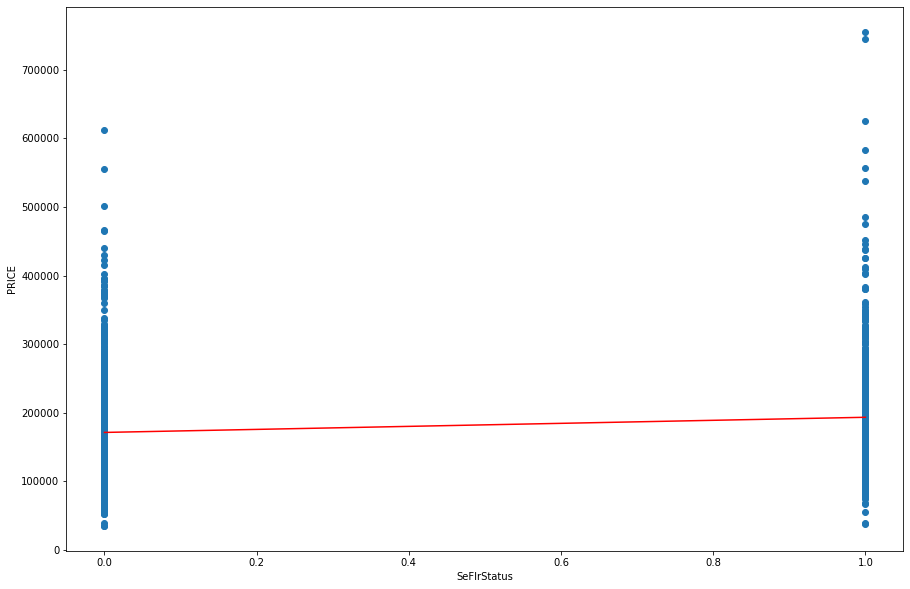

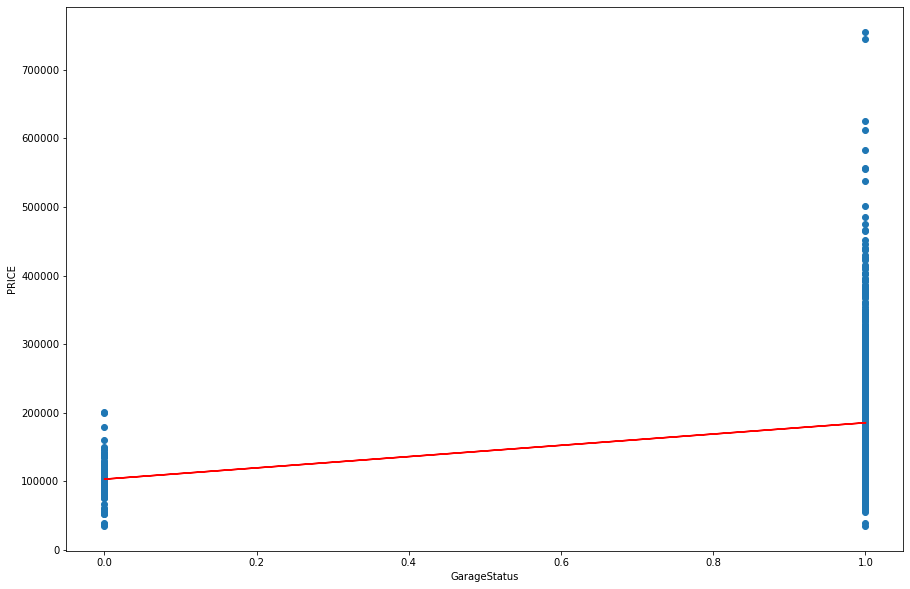

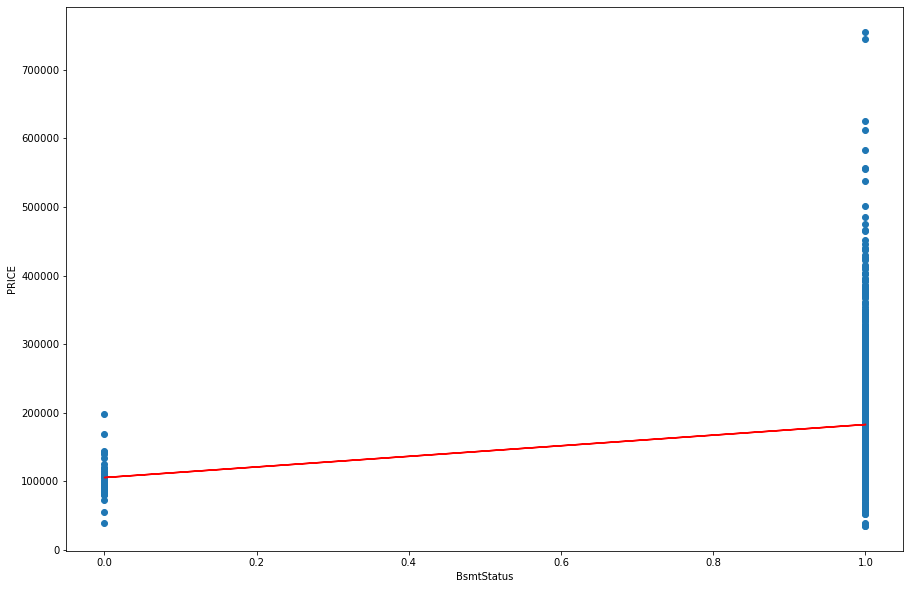

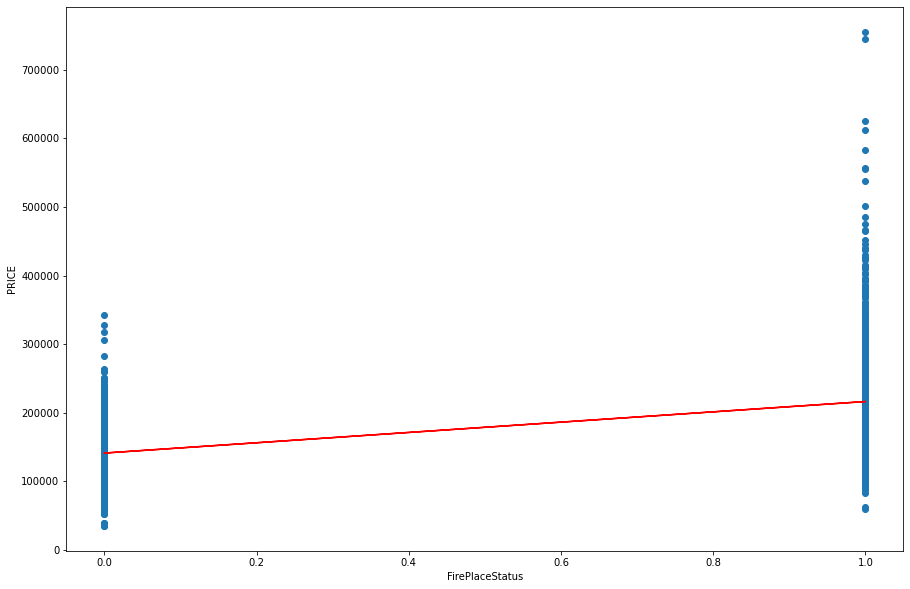

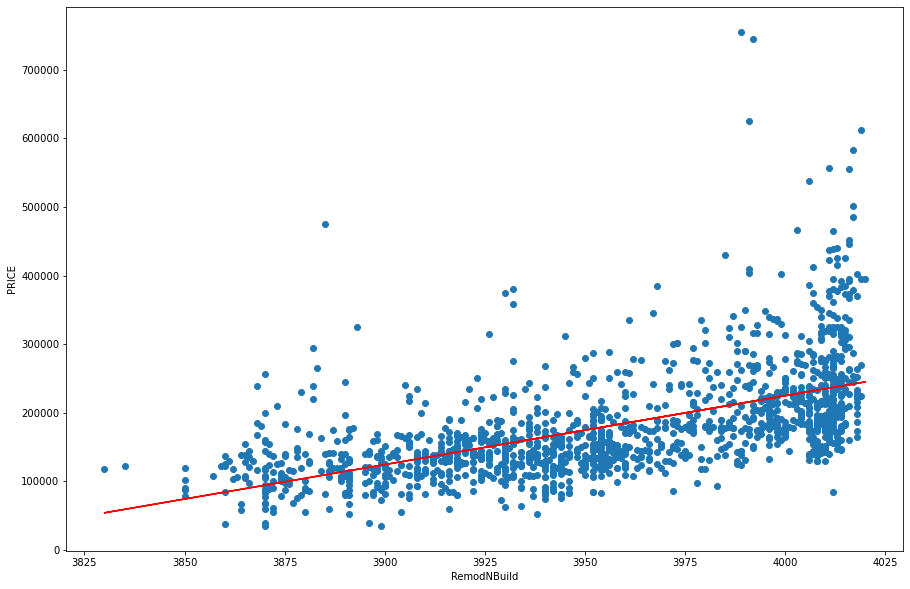

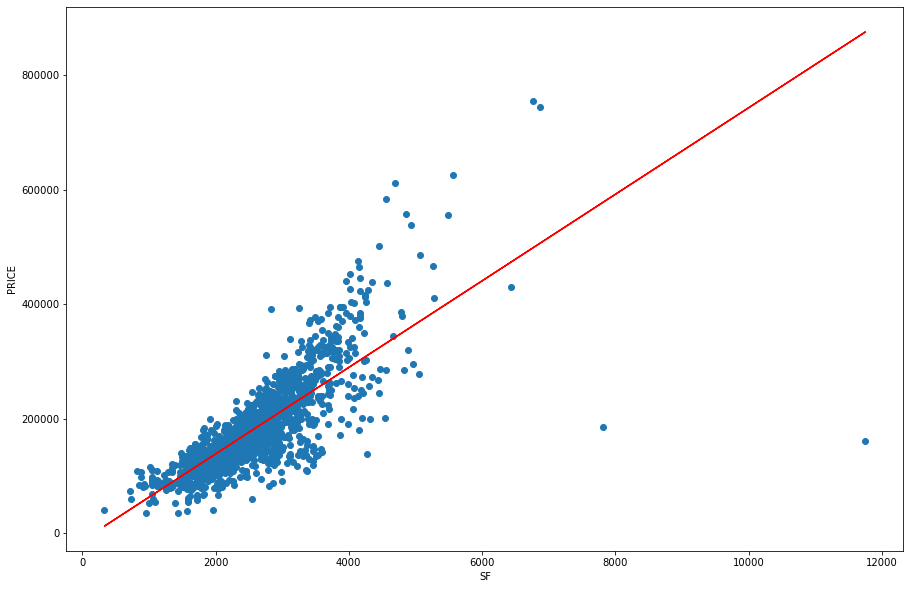

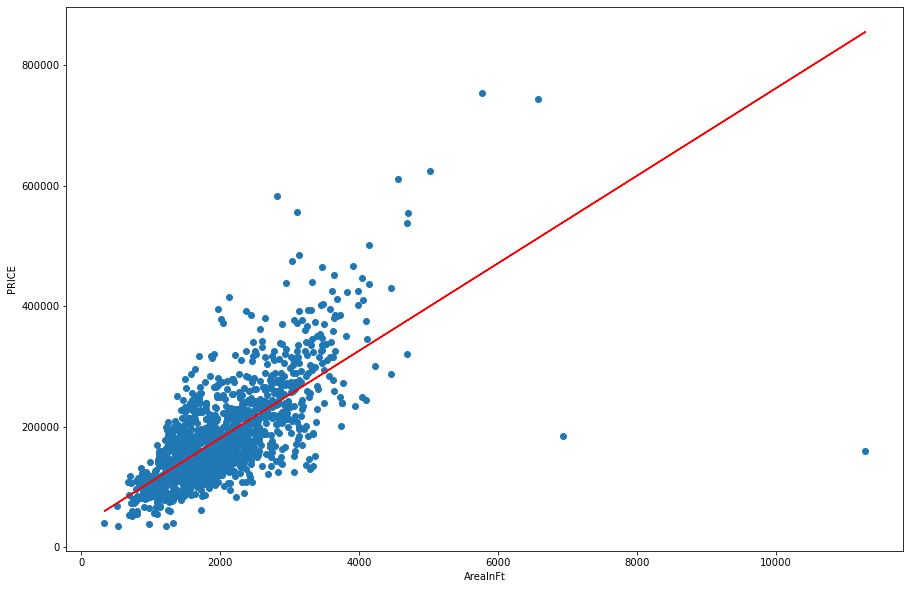

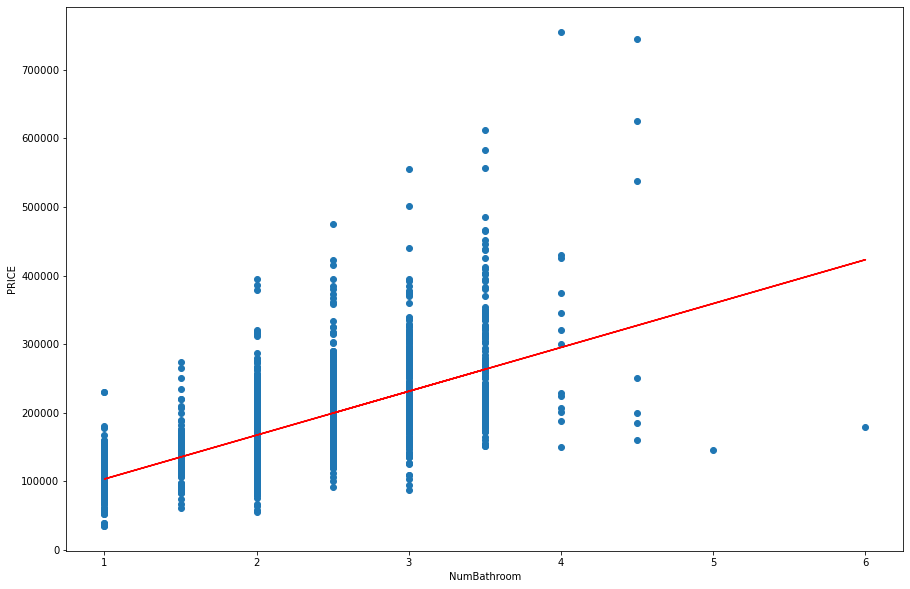

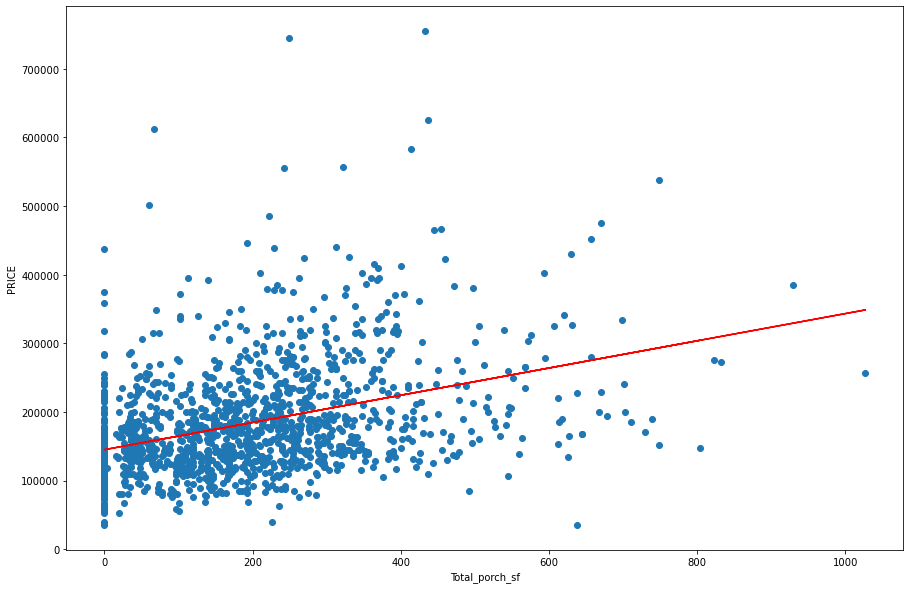

In [97]:
linerregression_plot(x_train, y_train_main)

# Работа с выбросами и слабыми признаками

In [250]:
drop_index = []
drop_index.extend(list(x_train[x_train['LotFrontage'] > 200].index))
drop_index.extend(list(x_train[x_train['LotArea'] > 100000].index))
drop_index.extend(list(x_train[x_train['MasVnrArea'] > 1500].index))
drop_index.extend(list(x_train[x_train['GrLivArea'] > 4500].index))
drop_index.extend(list(x_train[x_train['SF'] > 7500].index))
drop_index.extend(list(x_train[x_train['AreaInFt'] > 6600].index))

In [251]:
drop_index = list(set(drop_index))

In [252]:
x_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'PoolStatus', 'SeFlrStatus', 'GarageStatus',
       'BsmtStatus', 'FirePlaceStatus', 'Remo

In [253]:
drop_col = ['Id','Utilities','PoolQC']

In [254]:
drop_col.extend(['MSSubClass', 'BsmtFinType1', 'Heating', 'RoofMatl', 'GarageType', 'Electrical', 'MiscFeature', 
                 'SeFlrStatus', 'Condition2', 'Street', 'GarageFinish', 'GarageCond', 'LandSlope', 
                 'MiscVal', 'PoolStatus', 'LotShape'])

In [255]:
drop_col = list(set(drop_col))

In [259]:
x_train.drop(index=drop_index, inplace=True)
y_train_main.drop(index=drop_index, inplace=True)
x_train.drop(columns=drop_col, axis=1, inplace=True)
x_target.drop(columns=drop_col, axis=1, inplace=True)

In [209]:
def cross_val_my_f(x, y, model):
    CV = ShuffleSplit(n_splits=5, test_size=20, random_state=21)
    cv_score = cross_val_score(model, x, y, cv=CV)
    
    return round(cv_score.mean(), 5)
    
def features_selection(x, y):
    model = lgb.LGBMRegressor(random_state=21)
    features = list(x.columns)
    cv_score_best = cross_val_my_f(x, y, model)
    cv_score_next = 0
    drop_features = [] 
    
    print(f'__Начало отбора__\n\nПри всех признаках cv_score = {cv_score_best}\n')
    
    while len(features) > 1:
        
        scores_df = pd.DataFrame(index=features, columns=['cv_score'])
        print("Проверка cv_score при удаленных признаках")
        for col in tqdm(features):
            fit_features = list(set(features) - set([col]))
            scores_df.loc[col, 'cv_score'] = cross_val_my_f(x[fit_features], y, model)
            
        scores_df = scores_df.sort_values(by=['cv_score'], ascending=False)
        
        print('\n__Показатели cv_score при удаление признаков__')
        display(scores_df.head())
        
        cv_score_next = scores_df.iloc[0,0]
        if cv_score_next > cv_score_best:
            
            cv_score_best = cv_score_next
            cv_score_next = 0
            
            drop_features.append(scores_df.index[0])
            features = list(set(features) - set([scores_df.index[0]]))
            
            print('--------------------------------------------')
            print(f'    DROP   ====    {scores_df.index[0]}')
            print('--------------------------------------------')
            
        else:
            
            break
    print('--------------------------------------------')
    print("\n__Конец отбора__\n")
    print('--------------------------------------------')
    print(f"Рекомендовано удалить следующие признаки:\n {drop_features}")
    
    return drop_features

In [210]:
features_selection(x_train, y_train_main)

__Начало отбора__

При всех признаках cv_score = 0.9043

Проверка cv_score при удаленных признаках


100%|████████████████████████████████████████████████████████████████| 52/52 [01:03<00:00,  1.23s/it]


__Показатели cv_score при удаление признаков__


,cv_score
BsmtQual,0.91619
MasVnrArea,0.91524
LotArea,0.91069
BedroomAbvGr,0.91051
NumBathroom,0.91046


--------------------------------------------
    DROP   ====    BsmtQual
--------------------------------------------
Проверка cv_score при удаленных признаках


100%|████████████████████████████████████████████████████████████████| 51/51 [01:02<00:00,  1.22s/it]


__Показатели cv_score при удаление признаков__


,cv_score
LotArea,0.91722
FireplaceQu,0.91702
GarageStatus,0.91619
BsmtStatus,0.91619
LowQualFinSF,0.91599


--------------------------------------------
    DROP   ====    LotArea
--------------------------------------------
Проверка cv_score при удаленных признаках


100%|████████████████████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.21s/it]


__Показатели cv_score при удаление признаков__


,cv_score
BsmtCond,0.92101
RoofStyle,0.91996
RemodNBuild,0.9198
Alley,0.91871
Foundation,0.91863


--------------------------------------------
    DROP   ====    BsmtCond
--------------------------------------------
Проверка cv_score при удаленных признаках


100%|████████████████████████████████████████████████████████████████| 49/49 [01:02<00:00,  1.28s/it]


__Показатели cv_score при удаление признаков__


,cv_score
Alley,0.92162
GarageStatus,0.92101
BsmtStatus,0.92101
Fence,0.92018
ExterCond,0.9199


--------------------------------------------
    DROP   ====    Alley
--------------------------------------------
Проверка cv_score при удаленных признаках


100%|████████████████████████████████████████████████████████████████| 48/48 [01:05<00:00,  1.35s/it]


__Показатели cv_score при удаление признаков__


,cv_score
GarageStatus,0.92162
BsmtStatus,0.92162
Fence,0.92042
ExterCond,0.92021
RoofStyle,0.91868



__Конец отбора__

Рекомендовано удалить следующие признаки: ['BsmtQual', 'LotArea', 'BsmtCond', 'Alley']


['BsmtQual', 'LotArea', 'BsmtCond', 'Alley']

In [260]:
x_train.drop(columns=['BsmtQual', 'LotArea', 'BsmtCond', 'Alley'], axis=1, inplace=True)
x_target.drop(columns=['BsmtQual', 'LotArea', 'BsmtCond', 'Alley'], axis=1, inplace=True)

In [261]:
x_train.shape, x_target.shape

((1452, 48), (1459, 48))

# Hyperparameters tuning

In [263]:
ss = StandardScaler()
x_train_scaler = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_train_scaler

,MSZoning,LotFrontage,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtExposure,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageYrBlt,GarageCars,GarageQual,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition,GarageStatus,BsmtStatus,FirePlaceStatus,RemodNBuild,SF,AreaInFt,NumBathroom,Total_porch_sf
0,-0.048002,-0.244266,0.307946,0.602784,-1.208291,-0.034900,-0.412444,1.025889,0.658903,-0.516379,-0.490156,0.743029,0.750241,-1.235266,0.528373,-0.788202,0.365343,0.834172,0.624194,0.343399,-0.945496,-0.885569,0.264589,-0.120577,0.396640,0.165363,-0.212061,-0.414694,0.922974,0.256728,-0.075055,1.017557,0.313869,0.316557,0.290609,0.458970,-1.598882,0.137719,0.313227,0.210524,0.243066,0.161705,-1.050880,1.095351,0.015676,0.596735,1.663845,-0.768748
1,-0.048002,0.438361,0.307946,-0.631691,1.958565,-1.186608,-0.412444,-0.544857,-0.066990,2.177448,-0.490156,-0.508933,-0.663398,0.390850,-0.585937,0.664170,0.365343,-0.548497,-1.133963,0.343399,-0.642520,-0.885569,0.264589,-0.120577,-0.485546,0.165363,-0.212061,0.794414,-0.314476,0.256728,1.641160,-0.023821,0.313869,0.316557,0.290609,0.458970,-0.488434,-0.614040,0.313227,0.210524,0.243066,0.161705,0.951584,-0.088492,-0.038648,0.352656,0.380497,0.754732
2,-0.048002,-0.107740,0.307946,0.602784,-1.208291,-0.034900,-0.412444,1.025889,0.658903,-0.516379,-0.490156,0.743029,0.750241,-1.235266,0.335074,-0.788202,0.365343,0.834172,-0.254884,0.343399,-0.303367,-0.885569,0.264589,-0.120577,0.546297,0.165363,-0.212061,-0.414694,-0.314476,0.256728,1.641160,0.940418,0.313869,0.316557,0.290609,0.458970,0.992163,0.137719,0.313227,0.210524,0.243066,0.161705,0.951584,1.029582,0.196757,0.397034,1.663845,-0.890884
3,-0.048002,-0.471808,0.307946,-1.866165,-1.041614,-0.034900,-0.412444,1.025889,0.658903,-0.516379,-0.490156,1.056019,1.315697,0.390850,-0.585937,0.664170,0.365343,-1.931166,0.624194,0.343399,-0.063699,0.264562,0.264589,-0.120577,0.410424,0.165363,-0.212061,-0.414694,0.304249,0.256728,-0.933162,0.824709,1.650342,0.316557,0.290609,0.458970,-1.598882,-1.365798,0.313227,-3.417729,0.243066,0.161705,0.951584,-1.557335,-0.104613,-0.073095,-0.261177,0.812585
4,-0.048002,0.620394,0.307946,-0.631691,0.458476,-0.034900,-0.412444,1.025889,1.384796,-0.516379,-0.490156,0.743029,0.750241,-1.235266,1.403902,-0.788202,0.365343,0.834172,-2.013041,0.343399,-0.176750,-0.885569,0.264589,-0.120577,1.357593,1.390397,-0.212061,-0.414694,1.541699,0.256728,1.641160,0.901848,1.650342,0.316557,0.290609,0.458970,2.102611,0.137719,0.313227,0.210524,0.243066,0.161705,0.951584,0.963813,1.020677,1.202771,1.663845,0.613312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,-0.048002,-0.380791,0.307946,0.602784,-0.708261,-0.034900,-0.412444,1.025889,-0.066990,-0.516379,-0.490156,0.743029,0.750241,0.390850,-0.585937,0.664170,0.365343,0.834172,0.624194,0.343399,0.870101,-0.885569,0.264589,-0.120577,0.272583,0.165363,-0.212061,0.794414,0.304249,0.256728,1.641160,0.863278,0.313869,0.316557,0.290609,0.458970,0.622014,-0.614040,0.313227,0.210524,0.243066,0.161705,0.951584,0.941890,0.059653,-0.469723,0.380497,-0.903740
1448,-0.048002,0.665903,0.307946,0.602784,0.291799,-0.034900,-0.412444,-0.544857,-0.066990,0.381564,-0.490156,-0.195942,-0.097942,2.016967,0.090608,0.664170,0.365343,-0.548497,0.624194,-0.491802,0.047091,1.414693,0.264589,-0.120577,1.111447,0.165363,-0.212061,0.794414,0.304249,-3.817253,1.641160,0.053318,0.313869,0.316557,0.290609,-1.384529,-1.598882,1.641236,0.313227,0.210524,0.243066,0.161705,0.951584,0.218430,1.372491,1.442690,1.022171,1.082569
1449,-0.048002,-0.198757,0.307946,0.602784,-1.041614,-0.034900,-0.412444,1.025889,0.658903,3.075391,-0.4

In [301]:
def hyperparameter_tuning(x, y, algorithm, params):
    # подбор параметров для задач регрессии
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=21)
    CV = ShuffleSplit(n_splits=4, test_size=0.25, random_state=21)
    estimator = algorithm()
    
    randomized_model = RandomizedSearchCV(estimator,
                                         params,
                                         scoring='neg_mean_squared_error',
                                         cv=CV,
                                         n_iter=100,
                                         verbose=0,
                                         n_jobs = -4) # для использованья многопоточности
    
    randomized_fited_best_model = randomized_model.fit(x_train, y_train)
    best_parameters = randomized_fited_best_model.best_params_
    pred_test = randomized_fited_best_model.predict(x_test)
    
    MAE = mean_absolute_error(y_test, pred_test)
    MSE = mean_squared_error(y_test, pred_test)
    model = algorithm(**best_parameters)
    cv_score = cross_val_score(model, x, y, cv=CV)
    
    print("\n" + '-'*100)
    print(f"MAE\t\t: {MAE}")
    print(f"MSE\t\t: {MSE}")
    print(f"RMSE\t\t: {MSE ** 0.5}")
    print(f"cv_score\t: {cv_score} - {cv_score.mean()} mean")
    print("\n" + '-'*100)
    print(f"best_parameters\t: {best_parameters}")
    
    return best_parameters

In [280]:
params_dict = {}

In [314]:
# LGBMRegressor

# params  =  {'num_leaves': np.arange(2000, 3200, step=100),
#             'max_depth': [16, 18, 20, 22, 24],
#             'learning_rate': [0.001, 0.01, 0.1],
#             'n_estimators': np.arange(1000, 2500, step=100),
#             'subsample': [0.3, 0.35, 0.4],
#             'feature_fraction': [0.2, 0.25, 0.3],
#             'bagging_fraction': [0.2, 0.3, 0.4, 0,5],
#             'bagging_seed': [10, 12, 14, 16, 18],
#             'lambda_l1': [0.2, 0.3, 0.4],
#             'lambda_l2': [0.1, 0.2, 0.3],
#             'min_child_samples': [20, 24, 28, 32, 36],
#             'min_split_gain': [0.00001, 0.0001, 0.001, 0.01],
#             'n_jobs':[-1],
#             }


params  =  {'num_leaves': np.arange(2800, 3200, step=100),
            'max_depth': [16, 18, 20, 22, 24],
            'learning_rate': [0.01],
            'n_estimators': np.arange(1300, 1700, step=100),
            'subsample': [0.4, 0.45],
            'feature_fraction': [0.15, 0.2],
            'bagging_fraction': [0.1, 0.2, 0.3],
            'bagging_seed': [17, 18],
            'lambda_l1': [0.2],
            'lambda_l2': [0.3],
            'min_child_samples': [18, 20, 22],
            'min_split_gain': [0.01],
            'n_jobs':[-1],
            }

params_dict['LGBMRegressor'] = hyperparameter_tuning(x_train_scaler, y_train_main, lgb.LGBMRegressor, params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.45 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.45 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
[LightGBM] [Warning] feature_fraction i

In [312]:
#XGBRegressor

# params  =  {'subsample': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#             'learning_rate': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
#             'max_depth': [0, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 28, 30],
#             'gamma': [0, 1, 2, 3, 5, 10, 20, 50, 200],
#             'n_estimators': np.arange(500, 5000, step=500),
#             'colsample_bytree': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#             'colsample_bylevel': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#             'colsample_bynode': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#             'min_child_weight': [1, 2, 3, 5, 10, 20],
#             'seed': np.arange(5, 50, step=5),
#             'reg_alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
#             }
# best_parameters	: {'subsample': 0.5, 'seed': 25, 'reg_alpha': 0.0001, 'n_estimators': 2000, 
#                    'min_child_weight': 2, 'max_depth': 14, 'learning_rate': 0.1, 'gamma': 2,
#                    'colsample_bytree': 0.5, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.7}


params  =  {'subsample': [.5, .6],
            'learning_rate': [0.1],
            'max_depth': [13, 14, 15],
            'gamma': [0, 1],
            'n_estimators': np.arange(2000, 2201, step=100),
            'colsample_bytree': [.3, .4, .5],
            'colsample_bylevel': [.7, .8],
            'colsample_bynode': [.7, .8],
            'min_child_weight': [2],
            'seed': [24, 25, 26],
            'reg_alpha': [0.00001],
            }

params_dict['XGBRegressor'] = hyperparameter_tuning(x_train_scaler, y_train_main, XGBRegressor, params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits

----------------------------------------------------------------------------------------------------
MAE		: 13960.722174657534
MSE		: 392179092.37645483
RMSE		: 19803.51212225889
cv_score	: [0.89362803 0.90164418 0.91139371 0.92424567] - 0.9077278993370228 mean

----------------------------------------------------------------------------------------------------
best_parameters	: {'subsample': 0.5, 'seed': 25, 'reg_alpha': 1e-05, 'n_estimators': 2200, 'min_child_weight': 2, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.4, 'colsample_bynode': 0.8, 'colsample_bylevel': 0.7}


In [310]:
GradientBoostingRegressor

params   = {'n_estimators': np.arange(100, 2000, step=100),
            'learning_rate': [.01, .05, 0.1, .2, .3, .4, .5], 
            'max_depth': [3, 5, 8, 13, 21],         
            'max_features': ['sqrt'],                                  
            'min_samples_leaf': [5, 10, 15, 20],                  
            'min_samples_split': [5, 10, 15, 20],                  
            'loss': ['ls', 'lad', 'huber', 'quantile'],
            'criterion': ['friedman_mse', 'mse', 'mae'],
            }

params_dict['GradientBoostingRegressor'] = hyperparameter_tuning(x_train_scaler,
                                                                 y_train_main,
                                                                 GradientBoostingRegressor,
                                                                 params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits

----------------------------------------------------------------------------------------------------
MAE		: 13707.731054315238
MSE		: 367297402.74222857
RMSE		: 19165.00463715646
cv_score	: [0.91294557 0.90735924 0.9118152  0.93291309] - 0.9162582745261038 mean

----------------------------------------------------------------------------------------------------
best_parameters	: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'ls', 'learning_rate': 0.05, 'criterion': 'mae'}


In [303]:
KNeighborsRegressor

params  = { 'algorithm': ['auto'],
            'leaf_size': [2, 5, 10, 15, 20, 30, 40, 50],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_neighbors': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
            }

params_dict['KNeighborsRegressor'] = hyperparameter_tuning(x_train_scaler,
                                                           y_train_main,
                                                           KNeighborsRegressor,
                                                           params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits

----------------------------------------------------------------------------------------------------
MAE		: 16939.48542315452
MSE		: 602509175.9800047
RMSE		: 24546.062331461733
cv_score	: [0.86119131 0.84462987 0.81848188 0.88886871] - 0.8532929433003837 mean

----------------------------------------------------------------------------------------------------
best_parameters	: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'auto'}


In [306]:
# RandomForestRegressor

# params = {'bootstrap': [True, False],
#          'max_depth': [10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#          'max_features': ['auto', 'sqrt'],
#          'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9, 11, 13, 15],
#          'min_samples_split': [2, 3, 4, 5, 7, 8, 10],
#          'n_estimators': [200, 400, 800, 1200, 1600, 2000],
#          'max_leaf_nodes' : [2, 3, 4, 5, 7, 9, 11, 13, 15],
#          'max_samples' : [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#          'n_jobs':[1],
#          'oob_score':[True]
#          } 

# best_parameters	: {'oob_score': True, 'n_jobs': 1, 'n_estimators': 400, 'min_samples_split': 4,
#                    'min_samples_leaf': 5, 'max_samples': 0.6, 'max_leaf_nodes': 13,
#                    'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}

params = {'bootstrap': [True, False],
         'max_depth': [16, 18, 20, 22, 24],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [5, 6],
         'min_samples_split': [4],
         'n_estimators': [300, 400, 500, 600],
         'max_leaf_nodes' : [12, 13, 14],
         'max_samples' : [.6],
         'n_jobs':[1],
         'oob_score':[True]
         }


params_dict['RandomForestRegressor'] = hyperparameter_tuning(x_train_scaler,
                                                             y_train_main,
                                                             RandomForestRegressor,
                                                             params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits

----------------------------------------------------------------------------------------------------
MAE		: 19858.51266809697
MSE		: 702568242.1886287
RMSE		: 26506.003889470565
cv_score	: [0.81031276 0.83378161 0.85040364 0.8649069 ] - 0.8398512278940096 mean

----------------------------------------------------------------------------------------------------
best_parameters	: {'oob_score': True, 'n_jobs': 1, 'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_samples': 0.6, 'max_leaf_nodes': 14, 'max_features': 'auto', 'max_depth': 24, 'bootstrap': True}


In [315]:
params_dict

{'LGBMRegressor': {'subsample': 0.45,
  'num_leaves': 2900,
  'n_jobs': -1,
  'n_estimators': 1400,
  'min_split_gain': 0.01,
  'min_child_samples': 20,
  'max_depth': 20,
  'learning_rate': 0.01,
  'lambda_l2': 0.3,
  'lambda_l1': 0.2,
  'feature_fraction': 0.2,
  'bagging_seed': 18,
  'bagging_fraction': 0.1},
 'XGBRegressor': {'subsample': 0.5,
  'seed': 25,
  'reg_alpha': 1e-05,
  'n_estimators': 2200,
  'min_child_weight': 2,
  'max_depth': 13,
  'learning_rate': 0.1,
  'gamma': 1,
  'colsample_bytree': 0.4,
  'colsample_bynode': 0.8,
  'colsample_bylevel': 0.7},
 'GradientBoostingRegressor': {'n_estimators': 700,
  'min_samples_split': 20,
  'min_samples_leaf': 5,
  'max_features': 'sqrt',
  'max_depth': 5,
  'loss': 'ls',
  'learning_rate': 0.05,
  'criterion': 'mae'},
 'KNeighborsRegressor': {'weights': 'distance',
  'n_neighbors': 4,
  'metric': 'manhattan',
  'leaf_size': 30,
  'algorithm': 'auto'},
 'RandomForestRegressor': {'oob_score': True,
  'n_jobs': 1,
  'n_estimators'

In [343]:
def print_mean_error(y_main, y_pred):
    
        MAE = mean_absolute_error(y_main, y_pred)
        MSE = mean_squared_error(y_main, y_pred)

        print('-'*100)
        print(f"MAE:\t\t\t {MAE}")
        print(f"MSE:\t\t\t {MSE}")
        print(f"RMSE:\t\t\t {MSE ** 0.5}")
        print("\n" + '-'*100 + '\n')

def prediction(x, y, ML, params_dict, x_target):
    # ML - list моделей
    # param_dict = dict где key: имя модели в str, value: dict параметров модели 
    # return: dataframe из предсказаных y различными моделями 
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=21)
    
    # тестировка модели
    test_predict = pd.DataFrame()
    print('Проверка моделей' + '\n' + '-'*100)
    for model in ML:
        print(f"Выполняется работа:\t{model.__qualname__}")
        
        tmp_model = model(**params_dict[model.__qualname__])
        tmp_model.fit(x_train, y_train)
        test_predict[model.__qualname__] = tmp_model.predict(x_test)
        
        print_mean_error(y_test, test_predict[model.__qualname__])
    
    display(test_predict.head())
    print("Весь ансамбль")
    print_mean_error(y_test, test_predict.mean(axis=1))
    
    # предсказание
    predict_df = pd.DataFrame()
    print('ПРЕДСКАЗАНИЕ' + '\n' + '-'*100)
    for model in ML:
        print(f"Выполняется работа:\t{model.__qualname__}")
        
        tmp_model = model(**params_dict[model.__qualname__])
        tmp_model.fit(x, y)
        predict_df[model.__qualname__] = tmp_model.predict(x_target)
        
    print("\n" + '-'*100 + '\n')
    
    return predict_df


In [357]:
x_target_scaler = pd.DataFrame(ss.transform(x_target), columns=x_target.columns)
x_target_scaler

,MSZoning,LotFrontage,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtExposure,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageYrBlt,GarageCars,GarageQual,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition,GarageStatus,BsmtStatus,FirePlaceStatus,RemodNBuild,SF,AreaInFt,NumBathroom,Total_porch_sf
0,-1.632052,0.438361,0.307946,0.602784,-0.041554,-1.186608,-0.412444,-0.544857,-0.792883,0.381564,-0.490156,0.743029,0.750241,0.390850,-0.585937,0.664170,0.365343,-0.548497,0.624194,-2.162204,-0.674174,1.414693,0.264589,-0.120577,-1.206260,-1.059672,-0.212061,0.794414,-0.933201,0.256728,-0.075055,-0.602365,-1.022605,0.316557,0.290609,-1.384529,-0.118285,1.641236,0.313227,0.210524,0.243066,0.161705,-1.050880,-0.746183,-1.003552,-0.662490,-1.544526,0.510461
1,-0.048002,0.483869,0.307946,-1.866165,-0.041554,-0.034900,-0.412444,-0.544857,-0.066990,0.381564,1.914259,1.056019,1.032969,-1.235266,0.028070,0.664170,0.365343,-0.548497,0.624194,0.343399,-0.366676,1.414693,0.264589,-0.120577,-0.353612,0.165363,-0.212061,-0.414694,-0.314476,0.256728,-0.075055,-0.718073,-1.022605,0.316557,0.290609,0.458970,-0.118285,1.641236,0.313227,0.210524,0.243066,0.161705,-1.050880,-0.877721,0.134672,0.369298,-0.902851,1.596824
2,-0.048002,0.165310,0.307946,0.602784,-0.708261,-0.034900,-0.412444,1.025889,-0.792883,-0.516379,-0.490156,0.743029,0.750241,0.390850,-0.585937,0.664170,0.365343,0.834172,0.624194,0.343399,-0.974889,0.264562,0.264589,-0.120577,0.237138,0.165363,-0.212061,0.794414,-0.314476,0.256728,1.641160,0.786139,0.313869,0.316557,0.290609,-1.384529,-1.228733,1.641236,0.313227,0.210524,0.243066,0.161705,0.951584,0.854198,0.004035,0.602282,0.380497,0.420466
3,-0.048002,0.347344,0.307946,0.602784,-0.708261,-0.034900,-0.412444,1.025889,-0.066990,0.381564,-0.490156,0.743029,0.750241,-1.235266,-0.472232,0.664170,0.365343,0.834172,0.624194,0.343399,-0.552079,-0.885569,0.264589,-0.120577,0.187909,0.165363,-0.212061,-0.414694,0.304249,0.256728,-0.933162,0.824709,0.313869,0.316557,0.290609,0.458970,-0.118285,1.641236,0.313227,0.210524,0.243066,0.161705,0.951584,0.876121,-0.030887,0.305504,0.380497,1.384694
4,-0.048002,-1.245451,-2.558319,0.602784,1.625212,-0.034900,2.919228,-0.544857,1.384796,-0.516379,-0.490156,-1.134913,-1.228854,0.390850,-0.585937,-0.788202,0.365343,0.834172,0.624194,0.343399,1.014806,-0.885569,0.264589,-0.120577,-0.450101,-1.059672,-0.212061,-0.414694,-0.933201,0.256728,-0.075055,0.593292,0.313869,0.316557,0.290609,0.458970,-1.969031,1.641236,0.313227,0.210524,0.243066,0.161705,-1.050880,0.613044,0.007916,-0.613951,-0.261177,0.291902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.536049,-2.246636,0.307946,0.602784,-0.374908,-0.034900,2.086310,1.025889,-1.518776,1.279506,-0.490156,-1.447903,-1.511581,0.390850,-0.585937,0.664170,0.365343,-0.548497,0.624194,0.343399,-0.050133,0.264562,0.264589,-0.120577,-0.820304,0.165363,-0.212061,0.794414,-0.933201,0.256728,-0.075055,-0.429108,-2.359078,-1.903930,0.290609,0.458970,-0.118285,-1.365798,0.313227,0.210524,-4.114113,0.161705,-1.050880,-0.351569,-1.184633,-1.239403,-0.902851,-1.160867
1455,1.536049,-2.246636,0.307946,0.602784,-0.374908,-0.034900,2.919228,1.025889,-1.518776,-0.516379,-0.490156,-1.447903,-1.511581,0.390850,-0.585937,0.664170,0.365343,-0.548497,0.624194,0.343399,-0.619909,1.414693,0.264589,-0.120577,-0.820304,0.165363,-0.212061,0.794414,-0.314476,0.256728,-0.075055,-0.255239,-1.022605,0.316557,0.290609,0.458970,-0.858583,-1.365798,0.313227,-3.417729,0.243066,0.161705,-1.050880,-0.351569,-1.184633,-0.889927,-0.902851,-1.006591
1456,-0.048002,4.079034,0.307946,0.602784,-0.208231,-0.034900,-0.412444,-

In [358]:
ML = [LGBMRegressor, XGBRegressor, GradientBoostingRegressor, RandomForestRegressor]

predict_df = prediction(x_train_scaler, y_train_main, ML, params_dict, x_target_scaler)

Проверка моделей
----------------------------------------------------------------------------------------------------
Выполняется работа:	LGBMRegressor
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.45 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
----------------------------------------------------------------------------------------------------
MAE:			 14538.047667152969
MSE:			 422831123.016519
RMSE:			 20562.85785139116

----------------------------------------------------------------------------------------------------

Выполняется работа:	XGBRegressor
-----------------------------------------------------------------------------------

,LGBMRegressor,XGBRegressor,GradientBoostingRegressor,RandomForestRegressor
0,171336.918529,173843.140625,165029.627070,167196.429430
1,83864.626101,84775.531250,89852.908467,98217.316543
2,95452.144890,95890.164062,96378.633561,118239.062102
3,219769.471285,234454.000000,225125.859042,218199.132447
4,140745.848117,128008.328125,147899.419938,148049.490360


Весь ансамбль
----------------------------------------------------------------------------------------------------
MAE:			 14357.668752893755
MSE:			 394406122.716587
RMSE:			 19859.66068986545

----------------------------------------------------------------------------------------------------

ПРЕДСКАЗАНИЕ
----------------------------------------------------------------------------------------------------
Выполняется работа:	LGBMRegressor
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=0.45 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] lambda_l2 is set=0.3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3
Выполняется работа:	XGBRegressor
Выполняется работа:	GradientBoostingRegressor
Выполняется работа:	RandomF

In [359]:
output = pd.DataFrame({'Id': test['Id'],
                       'SalePrice': predict_df.mean(axis=1)})
output.to_csv('submission_skaler.csv', index=False)

---

In [360]:
output

,Id,SalePrice
0,1461,124241.798912
1,1462,154495.238888
2,1463,178243.025773
3,1464,193714.694593
4,1465,185956.710716
...,...,...
1454,2915,89471.347659
1455,2916,90063.545157
1456,2917,172650.044837
1457,2918,118623.417368
